TASK 1: Acquire the data

In [ ]:
# imports
import torch
from torchvision.datasets import FashionMNIST
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
from tensorflow import keras
from keras.utils import to_categorical



# 1.1 FASHION MNIST
# 1.1.1 Load Fashion MNIST dataset
# Fashion MNIST has 60 000 training examples, 10 000 test examples
# 25 x 25 pixels, grayscale
train_dataset_MNIST = FashionMNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_dataset_MNIST = FashionMNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor())


# 1.1.2 Create loader for Fashion MNIST
train_loader_MNIST = torch.utils.data.DataLoader(dataset=train_dataset_MNIST,
                                                 batch_size=64,
                                                 shuffle=True)

test_loader_MNIST = torch.utils.data.DataLoader(dataset=test_dataset_MNIST,
                                                batch_size=64,
                                                shuffle=False)

# 1.2 CIFAR-10
# 1.2.1 Load CIFAR-10 dataset
# CIFAR-10 has 50 000 training examples, 10 000 test examples
# 32 x 32 pixels, colored (RGB)
train_dataset_CIFAR10 = CIFAR10(root='./data', train=True,
                                download=True,
                                transform=transforms.ToTensor())

test_dataset_CIFAR10 = CIFAR10(root='./data',
                               train=False,
                               transform=transforms.ToTensor())

# 1.1.2 Create loader for CIFAR-10
train_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR10,
                                                   batch_size=64,
                                                   shuffle=True)

test_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR10,
                                                  batch_size=64,
                                                  shuffle=False)

# 1.3 Normalize the datasets
# 1.3.1 Normalize Fashion MNIST dataset
X_train_MNIST = train_dataset_MNIST.data
y_train_MNIST = train_dataset_MNIST.targets
X_test_MNIST = test_dataset_MNIST.data
y_test_MNIST = test_dataset_MNIST.targets

y_train_MNIST = to_categorical(y_train_MNIST, num_classes=10)
y_test_MNIST = to_categorical(y_test_MNIST, num_classes=10)

X_train_MNIST = np.reshape(X_train_MNIST,(60000,784))
X_test_MNIST = np.reshape(X_test_MNIST,(10000,784))
X_train_MNIST_unormalized = np.reshape(X_train_MNIST,(60000,784))
X_test_MNIST_unormalized = np.reshape(X_test_MNIST,(10000,784))
X_train_MNIST = X_train_MNIST.to(torch.float32)
X_test_MNIST = X_test_MNIST.to(torch.float32)
X_train_MNIST_unormalized = X_train_MNIST_unormalized.to(torch.float32)
X_test_MNIST_unormalized = X_test_MNIST_unormalized.to(torch.float32)
X_train_MNIST /= 255
X_test_MNIST /= 255

# 1.3.2 Normalize CIFAR-10 dataset
X_train_CIFAR = train_dataset_CIFAR10.data
y_train_CIFAR = train_dataset_CIFAR10.targets
X_test_CIFAR = test_dataset_CIFAR10.data
y_test_CIFAR = test_dataset_CIFAR10.targets

y_train_CIFAR = to_categorical(y_train_CIFAR, num_classes=10)
y_test_CIFAR = to_categorical(y_test_CIFAR, num_classes=10)

X_train_CIFAR = np.reshape(X_train_CIFAR,(50000,3072))
X_test_CIFAR = np.reshape(X_test_CIFAR,(10000,3072))
X_train_CIFAR_unormalized = np.reshape(X_train_CIFAR,(50000,3072))
X_test_CIFAR_unormalized = np.reshape(X_test_CIFAR,(10000,3072))
X_train_CIFAR = X_train_CIFAR.astype('float32')
X_test_CIFAR = X_test_CIFAR.astype('float32')
X_train_CIFAR_unormalized = X_train_CIFAR_unormalized.astype('float32')
X_test_CIFAR_unormalized = X_test_CIFAR_unormalized.astype('float32')

X_train_CIFAR /= 255
X_test_CIFAR /= 255

100%|██████████| 26421880/26421880 [00:01<00:00, 15129434.35it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 230385.93it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4293242.41it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4745555.38it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 170498071/170498071 [00:03<00:00, 55871335.21it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


TASK 2: Implement a Multilayer Perceptron

In [ ]:
# 2.1 Create Activation class
class Activation:
    def __init__(self, activation_type='sigmoid', alpha=0.3):
        self.activation_type = activation_type
        self.alpha = alpha

    def activate(self, z):
        if self.activation_type == 'relu':
            return self.relu(z)
        elif self.activation_type == 'leakyrelu':
            return self.leaky_relu(z)
        elif self.activation_type == 'sigmoid':
            return self.sigmoid(z)
        elif self.activation_type == 'softmax':
            return self.softmax(z)
        else:
            raise ValueError(f"Unsupported activation type: {self.activation_type}")

    def evaluate(self, z):
        if self.activation_type == 'relu':
            return self.relu_derivative(z)
        elif self.activation_type == 'leakyrelu':
            return self.leaky_relu_derivative(z)
        elif self.activation_type == 'sigmoid':
            return self.sigmoid_derivative(z)
        elif self.activation_type == 'softmax':
            return self.softmax_derivative(z)
        else:
            raise ValueError(f"Unsupported activation type: {self.activation_type}")

    def relu(self, z):
        return np.maximum(0, z)

    def leaky_relu(self, z):
        return np.maximum(0, z) + self.alpha * np.minimum(0, z)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, x):
        numerator = np.exp(x - np.max(x, axis=1, keepdims=True))
        denominator = np.sum(numerator, axis=1, keepdims=True)
        return numerator / denominator

    def relu_derivative(self, z):
        return np.where(z <= 0, 0, 1)

    def leaky_relu_derivative(self, z):
        return np.where(z <= 0, self.alpha, 1)

    def sigmoid_derivative(self, z):
        sigmoid_z = self.sigmoid(z)
        return sigmoid_z * (1 - sigmoid_z)

    def softmax_derivative(self, z):
        softmax_z = self.softmax(z)
        return softmax_z * (1 - softmax_z)

# 2.2 Create Evaluation Metrics class
class EvaluationMetrics:
    def __init__(self, activation_fn):
        self.activation_fn = activation_fn

    def activation(self, z):
        return self.activation_fn.activate(z)

    @staticmethod
    def calculate_loss(y_true, y_prev):
        epsilon = 1e-12
        y_prev = np.clip(y_prev, epsilon, 1.0 - epsilon)
        N = y_prev.shape[0]
        loss = -np.sum(y_true * np.log(y_prev + 1e-9)) / N
        return loss

    def calculate_error(self, y_true, y_prev):
        return (y_prev - y_true) * self.activation_fn.evaluate(y_prev)


# 2.3 Implement MLP model
class MultilayerPerceptron:
    def __init__(self, network, activation_types,  weight_init=None):
        self.layers = len(network)
        self.activations = {}
        self.loss = None
        self.learning_rate = None
        self.w = {}
        self.b = {}
        self.lam = None

        for i in range(len(network) - 1):
            if weight_init == "zeros":
                self.w[i + 1] = np.zeros((network[i], network[i + 1]))
                self.b[i + 1] = np.random.randn(network[i + 1]) * 0.01
            elif weight_init == "uniform":
                self.w[i + 1] = np.random.uniform(-1, 1, size=(network[i], network[i + 1]))/np.sqrt(network[i])
                self.b[i + 1] = np.zeros(network[i + 1])
            elif weight_init == "gaussian":
                self.w[i + 1] = np.random.normal(0, 1, size=(network[i], network[i + 1]))/np.sqrt(network[i])
                self.b[i + 1] = np.zeros(network[i + 1])
            elif weight_init == "xavier":
                std_dev = np.sqrt(2 / (network[i] + network[i + 1]))
                self.w[i + 1] = np.random.normal(0.0, std_dev, size=(network[i], network[i + 1]))
                self.b[i + 1] = np.zeros(network[i + 1])
            elif weight_init == "kaiming":
                self.w[i + 1] = np.random.normal(0, np.sqrt(2 / network[i]), size=(network[i], network[i + 1]))
                self.b[i + 1] = np.zeros(network[i + 1])
            # default
            else:
                self.w[i + 1] = np.random.normal(0, np.sqrt(2 / network[i]), size=(network[i], network[i + 1]))
                self.b[i + 1] = np.zeros(network[i + 1])

            activation_type = activation_types[i]
            if activation_type == 'relu':
                self.activations[i + 2] = Activation(activation_type='relu')
            elif activation_type == 'leakyrelu':
                self.activations[i + 2] = Activation(activation_type='leakyrelu')#, alpha=self.activations[i + 1].alpha)
            elif activation_type == 'sigmoid':
                self.activations[i + 2] = Activation(activation_type='sigmoid')
            elif activation_type == 'softmax':
                self.activations[i + 2] = Activation(activation_type='softmax')

    def forward(self, input):
        z = {}
        a = {1: input}
        for i in range(1, self.layers):
            z[i + 1] = np.dot(a[i], self.w[i]) + self.b[i]
            a[i + 1] = self.activations[i + 1].activate(z[i + 1])
        return z, a

    def backward(self, z, a, y_true):
        error = self.loss.calculate_error(y_true, a[self.layers])
        dw = np.dot(a[self.layers - 1].T, error)
        update_params = {
            self.layers - 1: (error, dw)
        }

        for i in reversed(range(2, self.layers)):
            error = np.dot(error, self.w[i].T) * self.activations[i].evaluate(z[i])
            dw = np.dot(a[i - 1].T, error)
            update_params[i - 1] = (error, dw)

        for k, v in update_params.items():
            self.update_parameters(k, v[0], v[1])

    def update_parameters(self, i, error, dw):
        dw += (self.lam) * self.w[i]
        self.w[i] -= self.learning_rate * dw
        self.b[i] -= self.learning_rate * np.mean(error, 0)

    def fit(self, X_train, y_train, X_test, y_test, lam, batch_size, epochs, learning_rate, loss=EvaluationMetrics, L1=False, L2=False):
        self.loss = loss(self.activations[self.layers])
        self.lam = lam
        self.learning_rate = learning_rate

        train_array = []
        test_array = []
        cost = []

        for i in range(epochs):
            seed = np.arange(X_train.shape[0], dtype=np.int32)
            np.random.shuffle(seed)
            x_ = X_train[seed]
            y_ = y_train[seed]
            for j in range(X_train.shape[0] // batch_size):
                k = j * batch_size
                l = (j + 1) * batch_size
                z, a = self.forward(x_[k:l])
                self.backward(z, a, y_[k:l])

            train_array.append(np.mean(self.predict(X_train) == np.argmax(y_train, axis=1)))
            test_array.append(np.mean(self.predict(X_test) == np.argmax(y_test, axis=1)))

            # this only does it for every 10 epochs
            # if (i + 1) % 10 == 0:
            _, a = self.forward(X_train)
            y_prev = a[self.layers]
            cost.append(loss.calculate_loss(y_train, y_prev))

            #add L1 regularization if needed
            if L1:
                for h in range(len(self.w)):
                    self.w[h+1] -= self.lam * np.sign(self.w[h+1])

            # add L2 regularization if needed
            if L2:
                for k in range(len(self.w)):
                    self.w[k+1] -= self.lam * self.w[k+1]

            #cost.append(self.loss.calculate_loss(y_train, y_prev))
            #print(cost)
            print("Epoch", i)
            print("Train accuracy:", train_array[-1])
            print("Test accuracy:", test_array[-1])
            #plt.plot(train_array, label='Train accuracy')
            #plt.plot(test_array, label='Test accuracy')
            #plt.legend(loc='best')
            #plt.ylabel('Accuracy')
            #plt.xlabel('Epochs')
            #plt.grid()
            #plt.show()

        plt.plot(train_array, label='Train accuracy')
        plt.plot(test_array, label='Test accuracy')
        plt.legend(loc='best')
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.grid()
        plt.show()
        plt.figure()

        plt.plot((np.arange(len(cost)) + 1), cost)
        plt.ylabel('Loss')
        plt.xlabel('epochs')
        plt.grid()
        plt.show()
        return train_array, test_array

    def predict(self, x):
        _, a = self.forward(x)
        return np.argmax(a[self.layers], axis=1)

    def evaluate_acc(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)

    def precision(self, y_true, y_pred):
        return np.sum(y_true * y_pred) / np.sum(y_pred)

    def recall(self, y_true, y_pred):
        return np.sum(y_true * y_pred) / np.sum(y_true)

Visualization of image with target label 9:


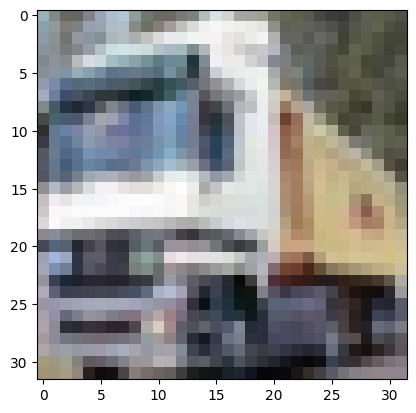

In [ ]:
print(f"Visualization of image with target label {train_dataset_CIFAR10.targets[1]}:")
plt.imshow(train_dataset_CIFAR10.data[1])
plt.show()

TASK 3: Run the experiments and report


Epoch 0
Train accuracy: 0.7624333333333333
Test accuracy: 0.7524
Epoch 1
Train accuracy: 0.8127833333333333
Test accuracy: 0.7991
Epoch 2
Train accuracy: 0.8240333333333333
Test accuracy: 0.8123
Epoch 3
Train accuracy: 0.8293
Test accuracy: 0.8171
Epoch 4
Train accuracy: 0.8266833333333333
Test accuracy: 0.8088
Epoch 5
Train accuracy: 0.8386166666666667
Test accuracy: 0.8237
Epoch 6
Train accuracy: 0.84455
Test accuracy: 0.831
Epoch 7
Train accuracy: 0.8590166666666667
Test accuracy: 0.8416
Epoch 8
Train accuracy: 0.8585833333333334
Test accuracy: 0.8397
Epoch 9
Train accuracy: 0.8602333333333333
Test accuracy: 0.8461
Epoch 10
Train accuracy: 0.86165
Test accuracy: 0.8477
Epoch 11
Train accuracy: 0.8632
Test accuracy: 0.8485
Epoch 12
Train accuracy: 0.8708333333333333
Test accuracy: 0.8528
Epoch 13
Train accuracy: 0.8699833333333333
Test accuracy: 0.8516
Epoch 14
Train accuracy: 0.8754833333333333
Test accuracy: 0.8546
Epoch 15
Train accuracy: 0.8782333333333333
Test accuracy: 0.8589
E

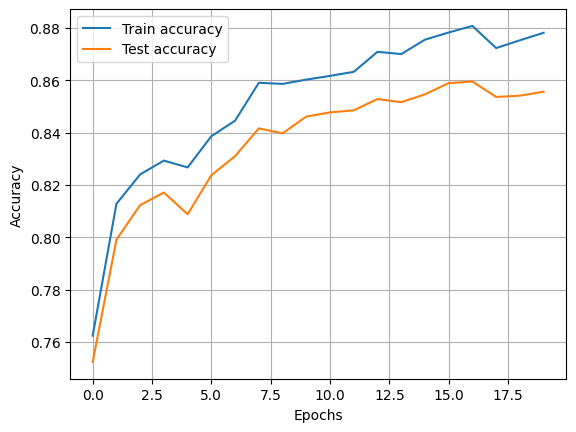

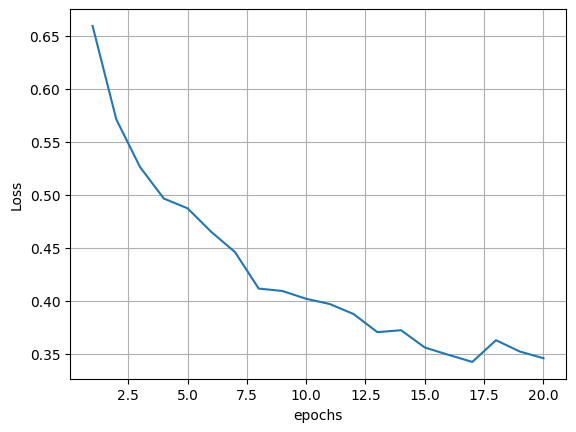

Accuracy of 2 hidden layer MLP with batch 128:  0.8556
Epoch 0
Train accuracy: 0.7882
Test accuracy: 0.7774
Epoch 1
Train accuracy: 0.7788833333333334
Test accuracy: 0.7685
Epoch 2
Train accuracy: 0.8149666666666666
Test accuracy: 0.8
Epoch 3
Train accuracy: 0.8327833333333333
Test accuracy: 0.8234
Epoch 4
Train accuracy: 0.8382333333333334
Test accuracy: 0.8259
Epoch 5
Train accuracy: 0.8454833333333334
Test accuracy: 0.8344
Epoch 6
Train accuracy: 0.8526166666666667
Test accuracy: 0.8413
Epoch 7
Train accuracy: 0.84565
Test accuracy: 0.8339
Epoch 8
Train accuracy: 0.8514833333333334
Test accuracy: 0.8412
Epoch 9
Train accuracy: 0.8519666666666666
Test accuracy: 0.8383
Epoch 10
Train accuracy: 0.8580833333333333
Test accuracy: 0.8429
Epoch 11
Train accuracy: 0.8564166666666667
Test accuracy: 0.8412
Epoch 12
Train accuracy: 0.8667833333333334
Test accuracy: 0.8517
Epoch 13
Train accuracy: 0.8711833333333333
Test accuracy: 0.8551
Epoch 14
Train accuracy: 0.8685166666666667
Test accuracy

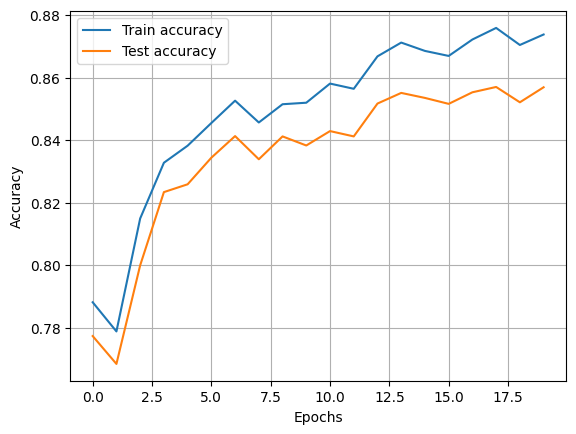

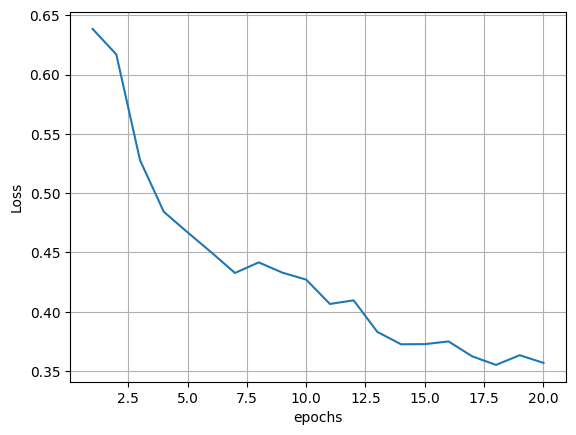

Accuracy of 2 hidden layer MLP with batch 256:  0.8569
Epoch 0
Train accuracy: 0.7674333333333333
Test accuracy: 0.7559
Epoch 1
Train accuracy: 0.8097666666666666
Test accuracy: 0.7975


In [ ]:
# #Choose hyperparameters
# #two layers
# model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
# train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# # accuracy calculation
# y_hat = model.predict(X_test_MNIST)
# print("Accuracy of 2 hidden layer MLP with lr=0.001: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

# #two layers
# model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
# train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.01)

# # accuracy calculation
# y_hat = model.predict(X_test_MNIST)
# print("Accuracy of 2 hidden layer MLP with lr=0.01: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

# #two layers
# model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
# train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.1)

# # accuracy calculation
# y_hat = model.predict(X_test_MNIST)
# print("Accuracy of 2 hidden layer MLP with lr=0.1: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

#batch size
model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=128, epochs=20, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy of 2 hidden layer MLP with batch 128: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=20, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy of 2 hidden layer MLP with batch 256: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=512, epochs=20, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy of 2 hidden layer MLP with batch 512: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))



3.1 Initializing weights differently

Weight initialization: zeros
Epoch 0
Train accuracy: 0.1
Test accuracy: 0.1
Epoch 1
Train accuracy: 0.10316666666666667
Test accuracy: 0.1025
Epoch 2
Train accuracy: 0.10463333333333333
Test accuracy: 0.105
Epoch 3
Train accuracy: 0.10633333333333334
Test accuracy: 0.1079
Epoch 4
Train accuracy: 0.10893333333333333
Test accuracy: 0.1095
Epoch 5
Train accuracy: 0.11228333333333333
Test accuracy: 0.1134
Epoch 6
Train accuracy: 0.11676666666666667
Test accuracy: 0.1178
Epoch 7
Train accuracy: 0.18078333333333332
Test accuracy: 0.181
Epoch 8
Train accuracy: 0.2617
Test accuracy: 0.2648
Epoch 9
Train accuracy: 0.27013333333333334
Test accuracy: 0.2722
Epoch 10
Train accuracy: 0.2804
Test accuracy: 0.2808
Epoch 11
Train accuracy: 0.40191666666666664
Test accuracy: 0.4034
Epoch 12
Train accuracy: 0.4206166666666667
Test accuracy: 0.418
Epoch 13
Train accuracy: 0.42893333333333333
Test accuracy: 0.4277
Epoch 14
Train accuracy: 0.44028333333333336
Test accuracy: 0.4389
Epoch 15
Train accuracy: 

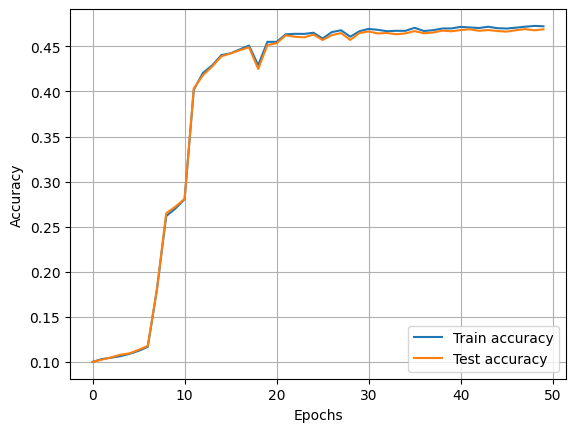

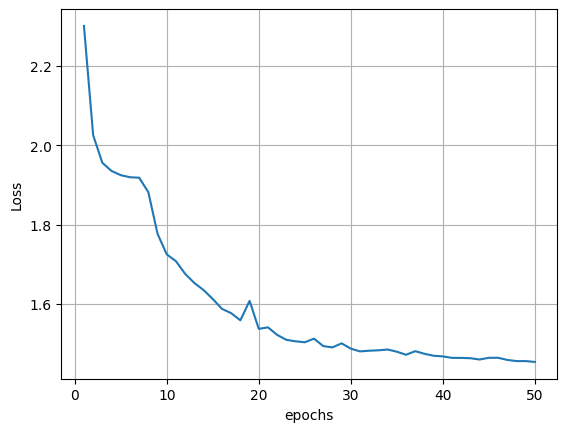

Accuracy for zeros:  0.4689
Weight initialization: kaiming
Epoch 0
Train accuracy: 0.76095
Test accuracy: 0.7446
Epoch 1
Train accuracy: 0.7908
Test accuracy: 0.7747
Epoch 2
Train accuracy: 0.8054
Test accuracy: 0.7938
Epoch 3
Train accuracy: 0.8088166666666666
Test accuracy: 0.7971
Epoch 4
Train accuracy: 0.8207666666666666
Test accuracy: 0.809
Epoch 5
Train accuracy: 0.8152333333333334
Test accuracy: 0.8049
Epoch 6
Train accuracy: 0.8312
Test accuracy: 0.819
Epoch 7
Train accuracy: 0.8411166666666666
Test accuracy: 0.8273
Epoch 8
Train accuracy: 0.8335666666666667
Test accuracy: 0.8245
Epoch 9
Train accuracy: 0.8422166666666666
Test accuracy: 0.83
Epoch 10
Train accuracy: 0.8485833333333334
Test accuracy: 0.8347
Epoch 11
Train accuracy: 0.84595
Test accuracy: 0.834
Epoch 12
Train accuracy: 0.8500666666666666
Test accuracy: 0.8374
Epoch 13
Train accuracy: 0.8527833333333333
Test accuracy: 0.8385
Epoch 14
Train accuracy: 0.8544833333333334
Test accuracy: 0.8378
Epoch 15
Train accuracy:

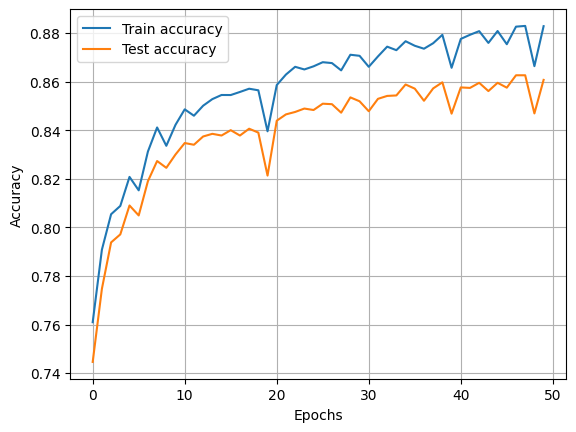

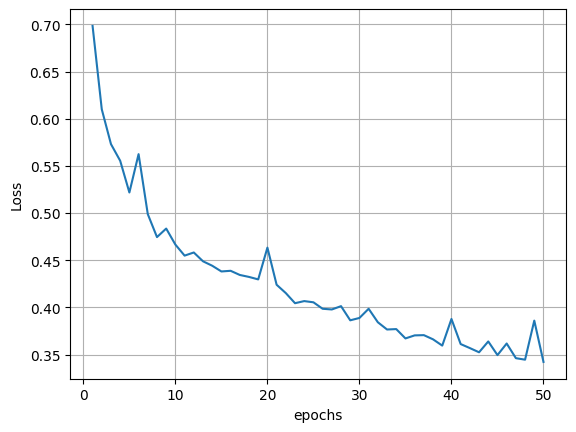

Accuracy for kaiming:  0.8607
Weight initialization: xavier
Epoch 0
Train accuracy: 0.7674833333333333
Test accuracy: 0.7532
Epoch 1
Train accuracy: 0.7923166666666667
Test accuracy: 0.7817
Epoch 2
Train accuracy: 0.80645
Test accuracy: 0.7947
Epoch 3
Train accuracy: 0.8187333333333333
Test accuracy: 0.8099
Epoch 4
Train accuracy: 0.8164333333333333
Test accuracy: 0.8024
Epoch 5
Train accuracy: 0.8237666666666666
Test accuracy: 0.8118
Epoch 6
Train accuracy: 0.8316666666666667
Test accuracy: 0.8223
Epoch 7
Train accuracy: 0.8414
Test accuracy: 0.8289
Epoch 8
Train accuracy: 0.8449166666666666
Test accuracy: 0.8331
Epoch 9
Train accuracy: 0.8459333333333333
Test accuracy: 0.8322
Epoch 10
Train accuracy: 0.8477
Test accuracy: 0.8343
Epoch 11
Train accuracy: 0.8521333333333333
Test accuracy: 0.837
Epoch 12
Train accuracy: 0.8511166666666666
Test accuracy: 0.8338
Epoch 13
Train accuracy: 0.8528166666666667
Test accuracy: 0.8404
Epoch 14
Train accuracy: 0.85625
Test accuracy: 0.8382
Epoch 1

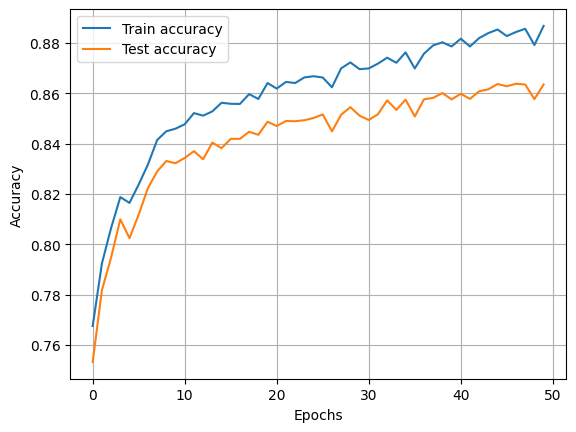

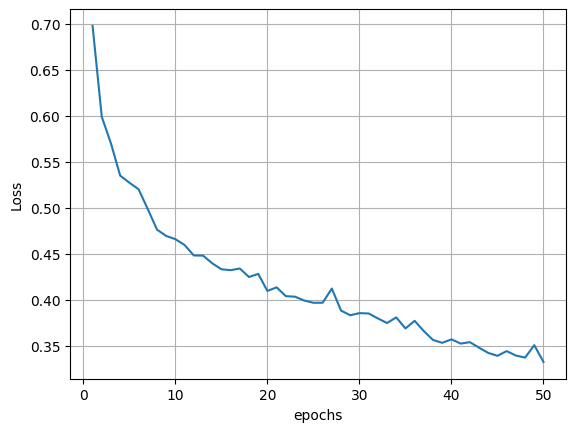

Accuracy for xavier:  0.8635
Weight initialization: gaussian
Epoch 0
Train accuracy: 0.7305666666666667
Test accuracy: 0.717
Epoch 1
Train accuracy: 0.7806166666666666
Test accuracy: 0.767
Epoch 2
Train accuracy: 0.78525
Test accuracy: 0.7766
Epoch 3
Train accuracy: 0.81085
Test accuracy: 0.7979
Epoch 4
Train accuracy: 0.8160166666666666
Test accuracy: 0.8056
Epoch 5
Train accuracy: 0.8228666666666666
Test accuracy: 0.8112
Epoch 6
Train accuracy: 0.8303333333333334
Test accuracy: 0.8174
Epoch 7
Train accuracy: 0.8315333333333333
Test accuracy: 0.8186
Epoch 8
Train accuracy: 0.8380166666666666
Test accuracy: 0.8251
Epoch 9
Train accuracy: 0.83815
Test accuracy: 0.8234
Epoch 10
Train accuracy: 0.83785
Test accuracy: 0.8231
Epoch 11
Train accuracy: 0.8424166666666667
Test accuracy: 0.8281
Epoch 12
Train accuracy: 0.8431333333333333
Test accuracy: 0.8299
Epoch 13
Train accuracy: 0.8458
Test accuracy: 0.8329
Epoch 14
Train accuracy: 0.8476
Test accuracy: 0.8322
Epoch 15
Train accuracy: 0.84

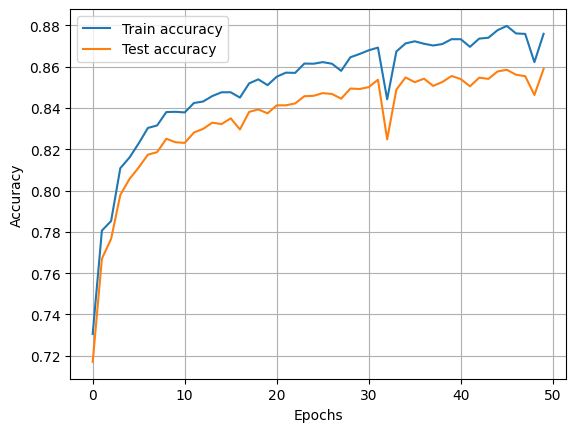

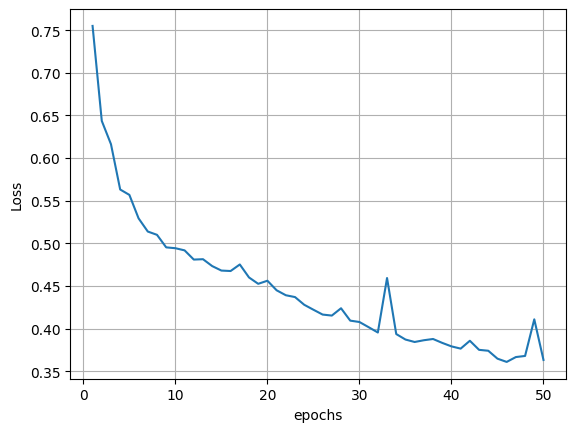

Accuracy for gaussian:  0.8589
Weight initialization: uniform
Epoch 0
Train accuracy: 0.6808166666666666
Test accuracy: 0.669
Epoch 1
Train accuracy: 0.7440333333333333
Test accuracy: 0.7327
Epoch 2
Train accuracy: 0.7861
Test accuracy: 0.7724
Epoch 3
Train accuracy: 0.80205
Test accuracy: 0.7899
Epoch 4
Train accuracy: 0.8006833333333333
Test accuracy: 0.7924
Epoch 5
Train accuracy: 0.8150833333333334
Test accuracy: 0.8005
Epoch 6
Train accuracy: 0.8178
Test accuracy: 0.805
Epoch 7
Train accuracy: 0.82755
Test accuracy: 0.8139
Epoch 8
Train accuracy: 0.8156666666666667
Test accuracy: 0.8046
Epoch 9
Train accuracy: 0.8314
Test accuracy: 0.818
Epoch 10
Train accuracy: 0.8251833333333334
Test accuracy: 0.8119
Epoch 11
Train accuracy: 0.8375666666666667
Test accuracy: 0.8246
Epoch 12
Train accuracy: 0.8416833333333333
Test accuracy: 0.8273
Epoch 13
Train accuracy: 0.8421333333333333
Test accuracy: 0.8278
Epoch 14
Train accuracy: 0.8386
Test accuracy: 0.8251
Epoch 15
Train accuracy: 0.8462

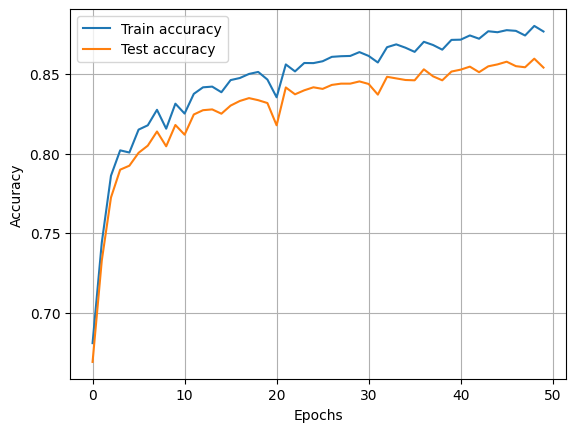

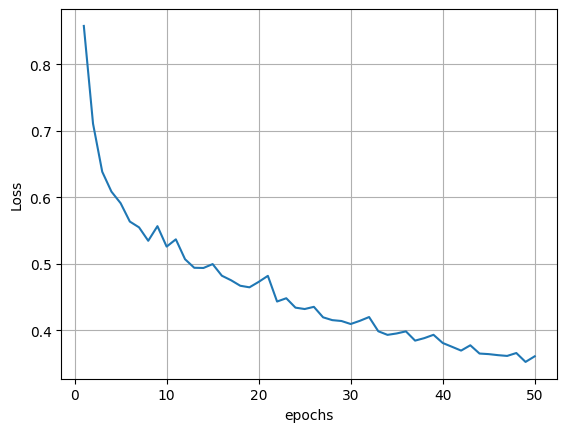

Accuracy for uniform:  0.8541


In [ ]:
#EXPERIMENT 1

#initialize weights differently
print('Weight initialization: zeros')
model = MultilayerPerceptron((784, 128, 10), ['relu','softmax'], weight_init='zeros')
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy for zeros: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

print('Weight initialization: kaiming')
model = MultilayerPerceptron((784, 128, 10), ['relu', 'softmax'], weight_init='kaiming')
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy for kaiming: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

print('Weight initialization: xavier')
model = MultilayerPerceptron((784, 128, 10), ['relu', 'softmax'], weight_init='xavier')
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy for xavier: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

print('Weight initialization: gaussian')
model = MultilayerPerceptron((784, 128, 10), ['relu', 'softmax'], weight_init='gaussian')
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy for gaussian: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

print('Weight initialization: uniform')
model = MultilayerPerceptron((784, 128, 10), ['relu', 'softmax'], weight_init='uniform')
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy for uniform: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

Epoch 0
Train accuracy: 0.7863333333333333
Test accuracy: 0.7768
Epoch 1
Train accuracy: 0.7887333333333333
Test accuracy: 0.7795
Epoch 2
Train accuracy: 0.8348333333333333
Test accuracy: 0.819
Epoch 3
Train accuracy: 0.8103833333333333
Test accuracy: 0.7913
Epoch 4
Train accuracy: 0.8347
Test accuracy: 0.822
Epoch 5
Train accuracy: 0.8087666666666666
Test accuracy: 0.7944
Epoch 6
Train accuracy: 0.7871833333333333
Test accuracy: 0.7723
Epoch 7
Train accuracy: 0.8338333333333333
Test accuracy: 0.8137
Epoch 8
Train accuracy: 0.8158333333333333
Test accuracy: 0.7978
Epoch 9
Train accuracy: 0.8455
Test accuracy: 0.8263
Epoch 10
Train accuracy: 0.8231833333333334
Test accuracy: 0.8084
Epoch 11
Train accuracy: 0.8398
Test accuracy: 0.8241
Epoch 12
Train accuracy: 0.8387166666666667
Test accuracy: 0.8189
Epoch 13
Train accuracy: 0.8525666666666667
Test accuracy: 0.834
Epoch 14
Train accuracy: 0.8449
Test accuracy: 0.8243
Epoch 15
Train accuracy: 0.8481833333333333
Test accuracy: 0.8295
Epoch

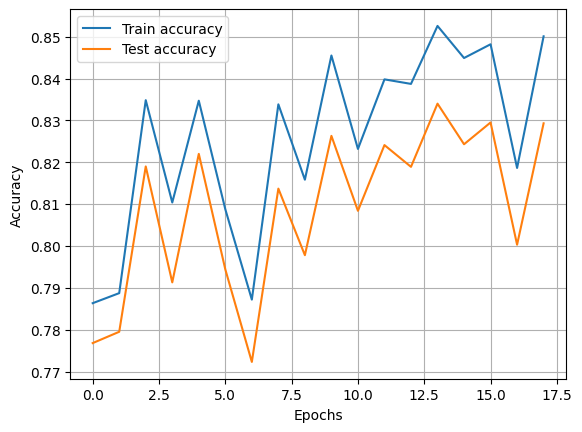

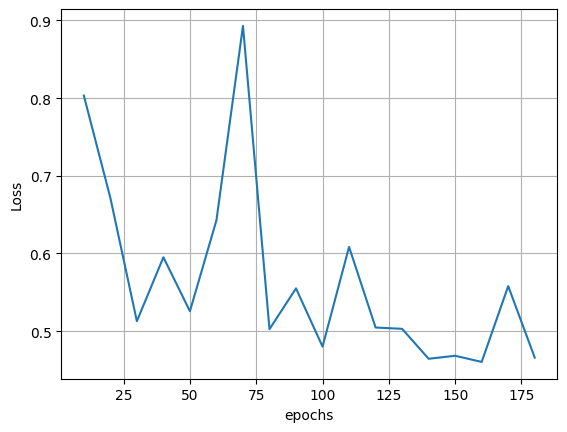

Accuracy of no hidden layer MLP:  0.8293
Epoch 0
Train accuracy: 0.8149833333333333
Test accuracy: 0.8035
Epoch 1
Train accuracy: 0.8376
Test accuracy: 0.8233
Epoch 2
Train accuracy: 0.8597666666666667
Test accuracy: 0.8431
Epoch 3
Train accuracy: 0.8716333333333334
Test accuracy: 0.8538
Epoch 4
Train accuracy: 0.8642833333333333
Test accuracy: 0.8465
Epoch 5
Train accuracy: 0.87275
Test accuracy: 0.8561
Epoch 6
Train accuracy: 0.8421
Test accuracy: 0.8238
Epoch 7
Train accuracy: 0.88405
Test accuracy: 0.8628
Epoch 8
Train accuracy: 0.85025
Test accuracy: 0.8308
Epoch 9
Train accuracy: 0.8792666666666666
Test accuracy: 0.8567
Epoch 10
Train accuracy: 0.88415
Test accuracy: 0.863
Epoch 11
Train accuracy: 0.8918166666666667
Test accuracy: 0.8703
Epoch 12
Train accuracy: 0.8914166666666666
Test accuracy: 0.865
Epoch 13
Train accuracy: 0.89735
Test accuracy: 0.8722
Epoch 14
Train accuracy: 0.9027333333333334
Test accuracy: 0.8758
Epoch 15
Train accuracy: 0.9027833333333334
Test accuracy: 0

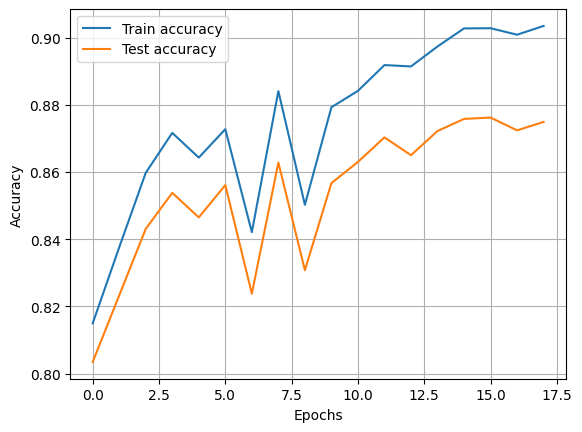

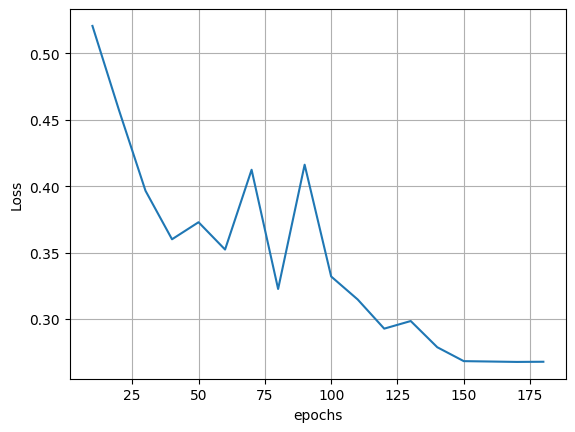

Accuracy of no hidden layer MLP:  0.8749
Epoch 0
Train accuracy: 0.8092833333333334
Test accuracy: 0.7962
Epoch 1
Train accuracy: 0.8487166666666667
Test accuracy: 0.836
Epoch 2
Train accuracy: 0.8484166666666667
Test accuracy: 0.8339
Epoch 3
Train accuracy: 0.8297
Test accuracy: 0.8168
Epoch 4
Train accuracy: 0.8623666666666666
Test accuracy: 0.8454
Epoch 5
Train accuracy: 0.8836833333333334
Test accuracy: 0.8665
Epoch 6
Train accuracy: 0.8846
Test accuracy: 0.8647
Epoch 7
Train accuracy: 0.8905166666666666
Test accuracy: 0.8689
Epoch 8
Train accuracy: 0.8853
Test accuracy: 0.8643
Epoch 9
Train accuracy: 0.8793666666666666
Test accuracy: 0.8589
Epoch 10
Train accuracy: 0.8990666666666667
Test accuracy: 0.8779
Epoch 11
Train accuracy: 0.8950166666666667
Test accuracy: 0.8731
Epoch 12
Train accuracy: 0.8945833333333333
Test accuracy: 0.8702
Epoch 13
Train accuracy: 0.90215
Test accuracy: 0.8788
Epoch 14
Train accuracy: 0.90825
Test accuracy: 0.8806
Epoch 15
Train accuracy: 0.90123333333

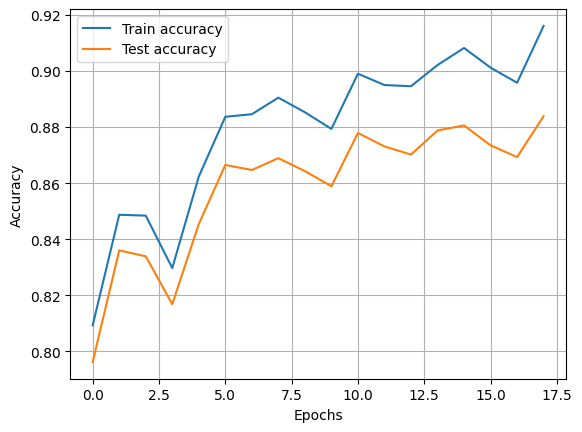

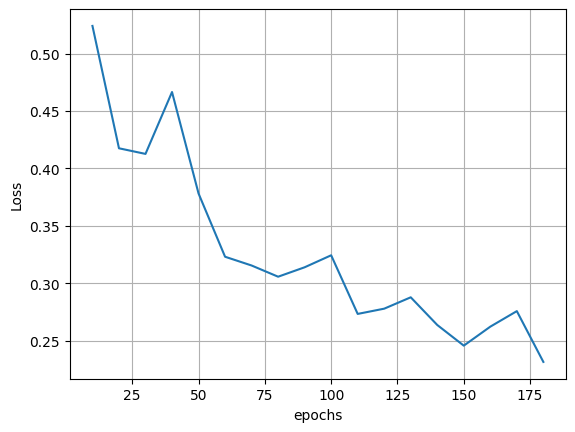

Accuracy of no hidden layer MLP:  0.8839


In [ ]:
 # EXPERIMENT 2
np.seterr(divide='ignore', invalid='ignore')
#no layer
model = MultilayerPerceptron((784, 10), ['softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=18, learning_rate=0.01)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy of no hidden layer MLP: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

#one layer
model = MultilayerPerceptron((784, 128, 10), ['relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=18, learning_rate=0.01)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy of 1 hidden layer MLP: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

#two layers
model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=18, learning_rate=0.01)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy of 2 hidden layer MLP: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

Epoch 0
Train accuracy: 0.6903
Test accuracy: 0.6861
Epoch 1
Train accuracy: 0.75805
Test accuracy: 0.7487
Epoch 2
Train accuracy: 0.8049333333333333
Test accuracy: 0.7921
Epoch 3
Train accuracy: 0.8110666666666667
Test accuracy: 0.8014
Epoch 4
Train accuracy: 0.82685
Test accuracy: 0.8153
Epoch 5
Train accuracy: 0.8349
Test accuracy: 0.8233
Epoch 6
Train accuracy: 0.8372166666666667
Test accuracy: 0.8239
Epoch 7
Train accuracy: 0.8456166666666667
Test accuracy: 0.8314
Epoch 8
Train accuracy: 0.8474
Test accuracy: 0.8357
Epoch 9
Train accuracy: 0.8509
Test accuracy: 0.8361
Epoch 10
Train accuracy: 0.8528166666666667
Test accuracy: 0.8393
Epoch 11
Train accuracy: 0.8362833333333334
Test accuracy: 0.8239
Epoch 12
Train accuracy: 0.85085
Test accuracy: 0.8364
Epoch 13
Train accuracy: 0.8573
Test accuracy: 0.8421
Epoch 14
Train accuracy: 0.86235
Test accuracy: 0.8465
Epoch 15
Train accuracy: 0.8635833333333334
Test accuracy: 0.8491
Epoch 16
Train accuracy: 0.8626333333333334
Test accuracy:

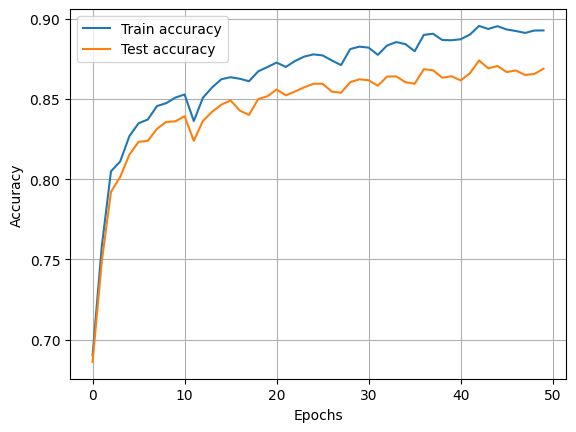

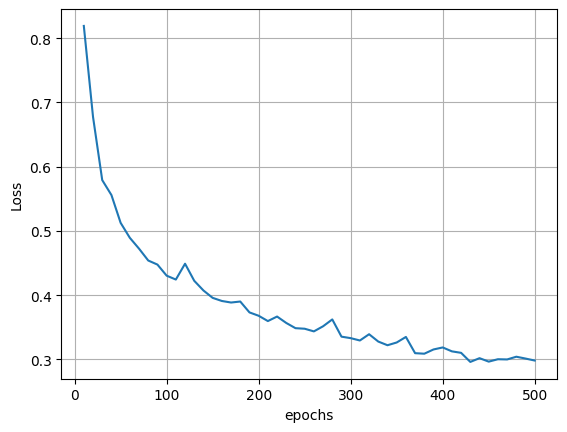

Accuracy with relu:  0.8689
Epoch 0
Train accuracy: 0.71065
Test accuracy: 0.6921
Epoch 1
Train accuracy: 0.7576166666666667
Test accuracy: 0.7461
Epoch 2
Train accuracy: 0.78935
Test accuracy: 0.774
Epoch 3
Train accuracy: 0.8134
Test accuracy: 0.7978
Epoch 4
Train accuracy: 0.8145666666666667
Test accuracy: 0.8032
Epoch 5
Train accuracy: 0.8228333333333333
Test accuracy: 0.8102
Epoch 6
Train accuracy: 0.8229666666666666
Test accuracy: 0.8092
Epoch 7
Train accuracy: 0.8400833333333333
Test accuracy: 0.8245
Epoch 8
Train accuracy: 0.83725
Test accuracy: 0.8242
Epoch 9
Train accuracy: 0.8472166666666666
Test accuracy: 0.8345
Epoch 10
Train accuracy: 0.8453333333333334
Test accuracy: 0.8309
Epoch 11
Train accuracy: 0.8484166666666667
Test accuracy: 0.8324
Epoch 12
Train accuracy: 0.8469
Test accuracy: 0.8321
Epoch 13
Train accuracy: 0.8571666666666666
Test accuracy: 0.8386
Epoch 14
Train accuracy: 0.85445
Test accuracy: 0.8363
Epoch 15
Train accuracy: 0.8595833333333334
Test accuracy: 0.

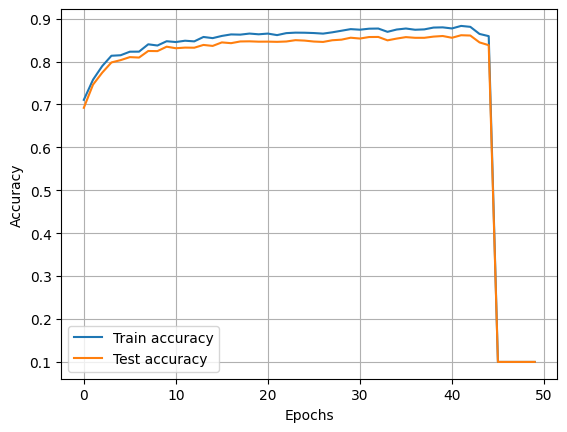

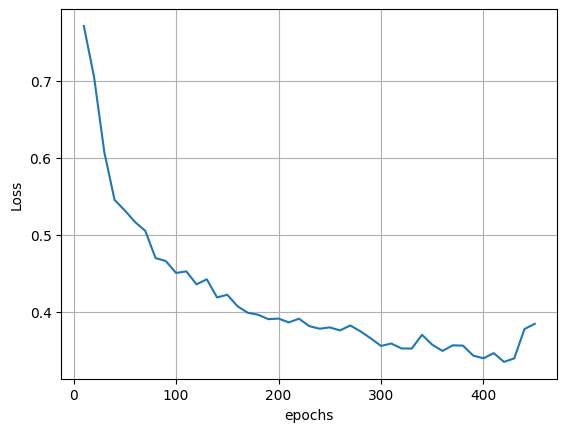

Accuracy with leakyrelu:  0.1
Epoch 0
Train accuracy: 0.3859
Test accuracy: 0.3909
Epoch 1
Train accuracy: 0.43653333333333333
Test accuracy: 0.439
Epoch 2
Train accuracy: 0.4343166666666667
Test accuracy: 0.4362
Epoch 3
Train accuracy: 0.4684333333333333
Test accuracy: 0.466
Epoch 4
Train accuracy: 0.5376166666666666
Test accuracy: 0.5423
Epoch 5
Train accuracy: 0.5894666666666667
Test accuracy: 0.5914
Epoch 6
Train accuracy: 0.6141
Test accuracy: 0.6143
Epoch 7
Train accuracy: 0.6535166666666666
Test accuracy: 0.6545
Epoch 8
Train accuracy: 0.6657666666666666
Test accuracy: 0.6614
Epoch 9
Train accuracy: 0.6713666666666667
Test accuracy: 0.6679
Epoch 10
Train accuracy: 0.6765333333333333
Test accuracy: 0.6736
Epoch 11
Train accuracy: 0.6985833333333333
Test accuracy: 0.6952
Epoch 12
Train accuracy: 0.6972333333333334
Test accuracy: 0.6908
Epoch 13
Train accuracy: 0.69795
Test accuracy: 0.6927
Epoch 14
Train accuracy: 0.7155833333333333
Test accuracy: 0.7132
Epoch 15
Train accuracy: 0

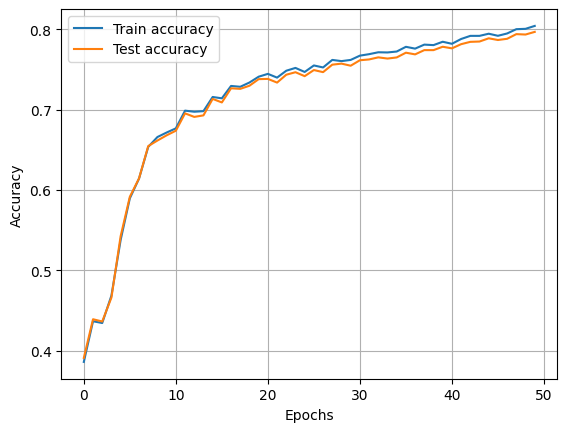

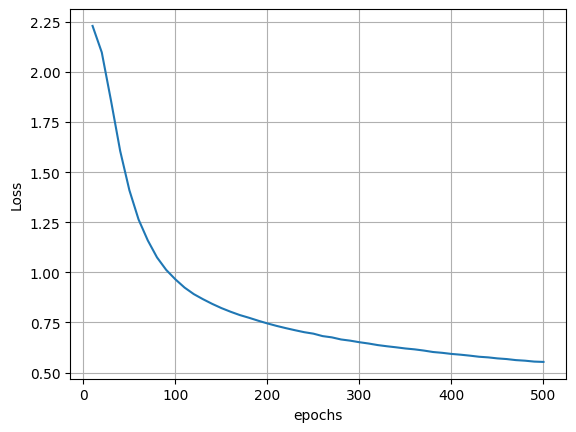

Accuracy with sigmoid:  0.7966


In [ ]:
#EXPERIMENT 3
# Create an instance MLP model FASHION MNIST
model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy with relu: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

# Create an instance MLP model FASHION MNIST
model = MultilayerPerceptron((784, 128, 128, 10), ['leakyrelu', 'leakyrelu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy with leakyrelu: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

# Create an instance MLP model FASHION MNIST
model = MultilayerPerceptron((784, 128, 128, 10), ['sigmoid', 'sigmoid', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy with sigmoid: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

3.4 Adding L1 and L2 regularization

Epoch 0
Train accuracy: 0.7119666666666666
Test accuracy: 0.7028
Epoch 1
Train accuracy: 0.77215
Test accuracy: 0.7562
Epoch 2
Train accuracy: 0.7872166666666667
Test accuracy: 0.7767
Epoch 3
Train accuracy: 0.8200833333333334
Test accuracy: 0.8062
Epoch 4
Train accuracy: 0.8260833333333333
Test accuracy: 0.8117
Epoch 5
Train accuracy: 0.8238166666666666
Test accuracy: 0.8102
Epoch 6
Train accuracy: 0.8354833333333334
Test accuracy: 0.8222
Epoch 7
Train accuracy: 0.8439
Test accuracy: 0.833
Epoch 8
Train accuracy: 0.8404166666666667
Test accuracy: 0.8269
Epoch 9
Train accuracy: 0.8495833333333334
Test accuracy: 0.8366
Epoch 10
Train accuracy: 0.8489333333333333
Test accuracy: 0.8354
Epoch 11
Train accuracy: 0.8531666666666666
Test accuracy: 0.8426
Epoch 12
Train accuracy: 0.8530166666666666
Test accuracy: 0.8404
Epoch 13
Train accuracy: 0.85075
Test accuracy: 0.8392
Epoch 14
Train accuracy: 0.8606
Test accuracy: 0.8442
Epoch 15
Train accuracy: 0.8633833333333333
Test accuracy: 0.8475
E

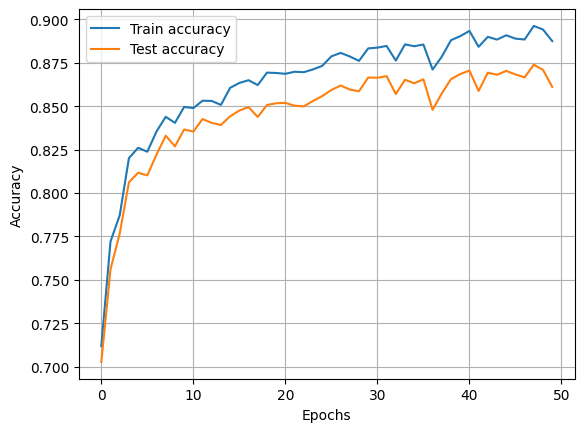

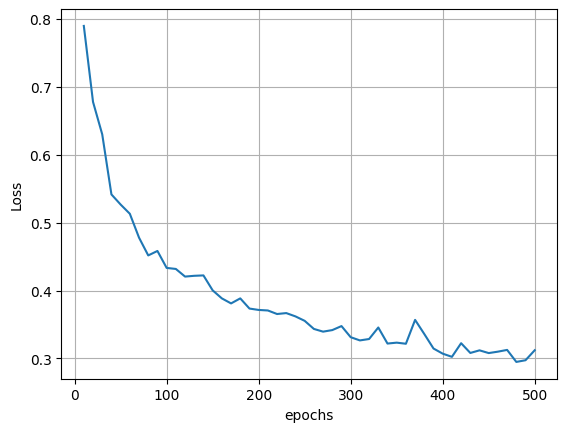

Accuracy with no regularization:  0.8611
Epoch 0
Train accuracy: 0.7133666666666667
Test accuracy: 0.6967
Epoch 1
Train accuracy: 0.7475166666666667
Test accuracy: 0.7347
Epoch 2
Train accuracy: 0.8101666666666667
Test accuracy: 0.7992
Epoch 3
Train accuracy: 0.8140833333333334
Test accuracy: 0.8
Epoch 4
Train accuracy: 0.8329666666666666
Test accuracy: 0.8217
Epoch 5
Train accuracy: 0.82515
Test accuracy: 0.8112
Epoch 6
Train accuracy: 0.8446666666666667
Test accuracy: 0.83
Epoch 7
Train accuracy: 0.8503333333333334
Test accuracy: 0.8382
Epoch 8
Train accuracy: 0.84165
Test accuracy: 0.8255
Epoch 9
Train accuracy: 0.8420666666666666
Test accuracy: 0.8296
Epoch 10
Train accuracy: 0.8495833333333334
Test accuracy: 0.8375
Epoch 11
Train accuracy: 0.8524666666666667
Test accuracy: 0.8349
Epoch 12
Train accuracy: 0.8619833333333333
Test accuracy: 0.8447
Epoch 13
Train accuracy: 0.86195
Test accuracy: 0.8475
Epoch 14
Train accuracy: 0.8626
Test accuracy: 0.8451
Epoch 15
Train accuracy: 0.84

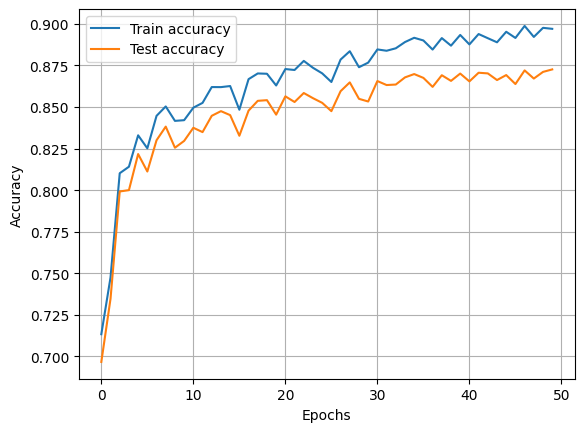

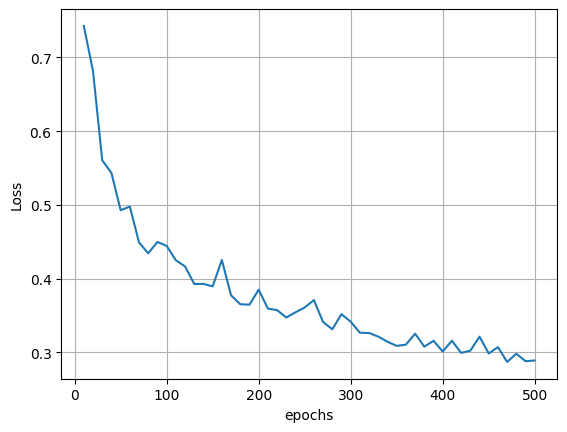

Accuracy with L1:  0.8726
Epoch 0
Train accuracy: 0.6776
Test accuracy: 0.6715
Epoch 1
Train accuracy: 0.7711333333333333
Test accuracy: 0.7598
Epoch 2
Train accuracy: 0.8048
Test accuracy: 0.7894
Epoch 3
Train accuracy: 0.8153166666666667
Test accuracy: 0.8044
Epoch 4
Train accuracy: 0.8155666666666667
Test accuracy: 0.8002
Epoch 5
Train accuracy: 0.8062
Test accuracy: 0.7999
Epoch 6
Train accuracy: 0.83675
Test accuracy: 0.8257
Epoch 7
Train accuracy: 0.8424166666666667
Test accuracy: 0.8264
Epoch 8
Train accuracy: 0.84625
Test accuracy: 0.8303
Epoch 9
Train accuracy: 0.8548333333333333
Test accuracy: 0.8412
Epoch 10
Train accuracy: 0.8501833333333333
Test accuracy: 0.8358
Epoch 11
Train accuracy: 0.8493
Test accuracy: 0.8325
Epoch 12
Train accuracy: 0.86265
Test accuracy: 0.8457
Epoch 13
Train accuracy: 0.86045
Test accuracy: 0.8443
Epoch 14
Train accuracy: 0.8631833333333333
Test accuracy: 0.8473
Epoch 15
Train accuracy: 0.8629166666666667
Test accuracy: 0.8474
Epoch 16
Train accur

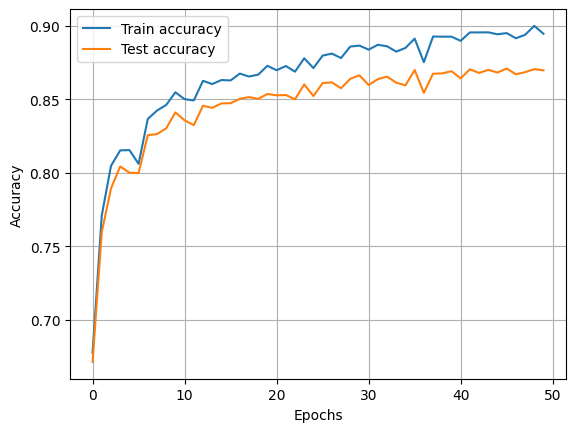

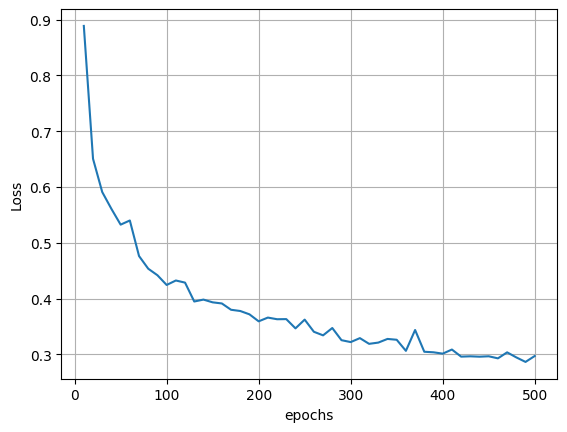

Accuracy with L2:  0.8698


In [ ]:
# EXPERIMENT 4

#no reg
model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy with no regularization: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

#L1
model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001,L1=True)
# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy with L1: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

# L2

model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001,L2=True)
# accuracy calculation
y_hat = model.predict(X_test_MNIST)
print("Accuracy with L2: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

3.5 Unnormlized data

Epoch 0
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 1
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 2
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 3
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 4
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 5
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 6
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 7
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 8
Train accuracy: 0.1
Test accuracy: 0.1001
Epoch 9
Train accuracy: 0.1
Test accuracy: 0.1001


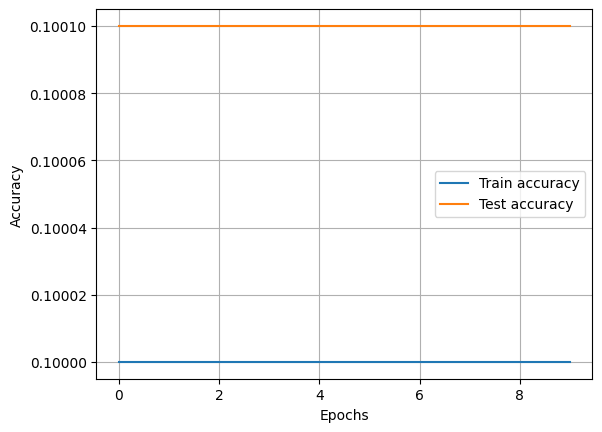

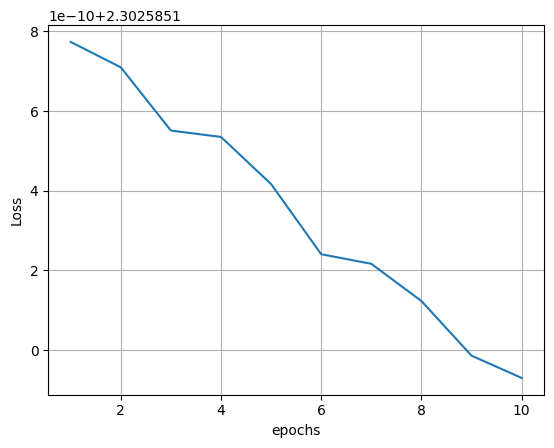

Accuracy unnormalized:  0.1001


In [ ]:
#EXPERIMENT 5

#train with unnormalized data
model = MultilayerPerceptron((784, 128, 128, 10), ['relu', 'relu', 'softmax'])
train_array, test_array = model.fit(X_train_MNIST_unormalized , y_train_MNIST, X_test_MNIST_unormalized , y_test_MNIST, lam=0, batch_size=256, epochs=10, learning_rate=0.001)

# accuracy calculation
y_hat = model.predict(X_test_MNIST_unormalized)
print("Accuracy unnormalized: ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

Bonus: Changing size of layers

One layer:
Width 32
Epoch 0
Train accuracy: 0.74145
Test accuracy: 0.7328
Epoch 1
Train accuracy: 0.7894
Test accuracy: 0.777
Epoch 2
Train accuracy: 0.8008333333333333
Test accuracy: 0.7926
Epoch 3
Train accuracy: 0.81635
Test accuracy: 0.805
Epoch 4
Train accuracy: 0.8233
Test accuracy: 0.8132
Epoch 5
Train accuracy: 0.81145
Test accuracy: 0.7983
Epoch 6
Train accuracy: 0.8333833333333334
Test accuracy: 0.8224
Epoch 7
Train accuracy: 0.8238833333333333
Test accuracy: 0.8131
Epoch 8
Train accuracy: 0.8346666666666667
Test accuracy: 0.8232
Epoch 9
Train accuracy: 0.8350166666666666
Test accuracy: 0.8224
Epoch 10
Train accuracy: 0.8431666666666666
Test accuracy: 0.8317
Epoch 11
Train accuracy: 0.84025
Test accuracy: 0.8288
Epoch 12
Train accuracy: 0.8427
Test accuracy: 0.832
Epoch 13
Train accuracy: 0.8454333333333334
Test accuracy: 0.8311
Epoch 14
Train accuracy: 0.8476666666666667
Test accuracy: 0.8367
Epoch 15
Train accuracy: 0.8472166666666666
Test accuracy: 0.833
Epoch 16
Train acc

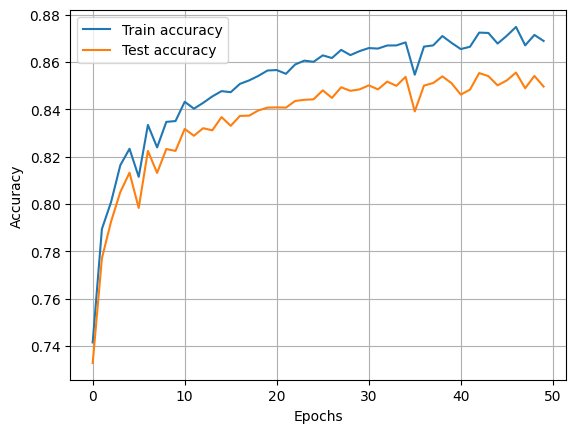

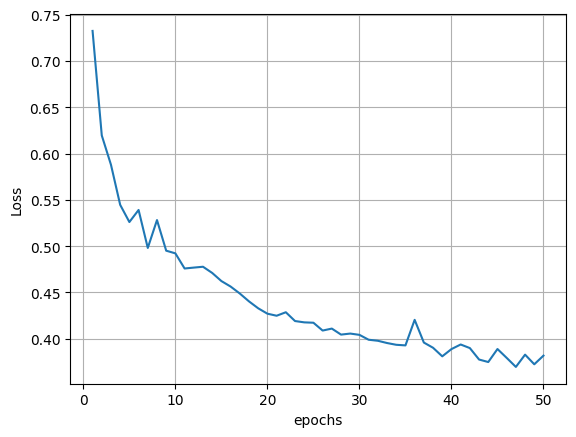

Accuracy with one layer with width 32:  0.8496
Width 64
Epoch 0
Train accuracy: 0.74675
Test accuracy: 0.7354
Epoch 1
Train accuracy: 0.7646333333333334
Test accuracy: 0.7528
Epoch 2
Train accuracy: 0.80465
Test accuracy: 0.7912
Epoch 3
Train accuracy: 0.8069
Test accuracy: 0.7962
Epoch 4
Train accuracy: 0.82435
Test accuracy: 0.8098
Epoch 5
Train accuracy: 0.8269166666666666
Test accuracy: 0.8135
Epoch 6
Train accuracy: 0.8234666666666667
Test accuracy: 0.8102
Epoch 7
Train accuracy: 0.8327833333333333
Test accuracy: 0.8173
Epoch 8
Train accuracy: 0.8388166666666667
Test accuracy: 0.8246
Epoch 9
Train accuracy: 0.8436666666666667
Test accuracy: 0.826
Epoch 10
Train accuracy: 0.8376166666666667
Test accuracy: 0.8226
Epoch 11
Train accuracy: 0.8467166666666667
Test accuracy: 0.8301
Epoch 12
Train accuracy: 0.8464333333333334
Test accuracy: 0.8298
Epoch 13
Train accuracy: 0.8498
Test accuracy: 0.8321
Epoch 14
Train accuracy: 0.8514833333333334
Test accuracy: 0.8326
Epoch 15
Train accurac

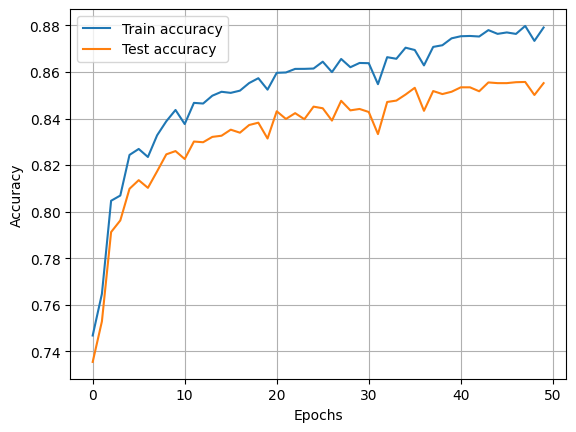

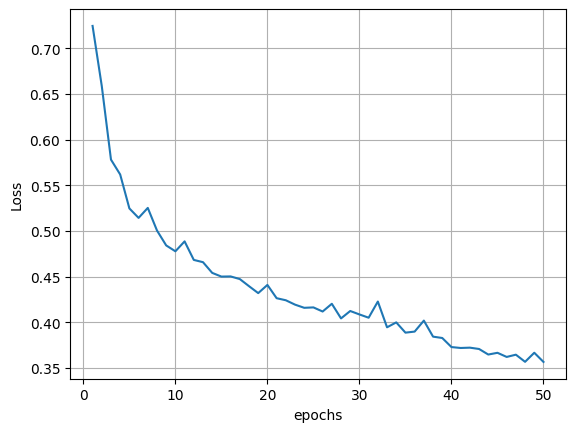

Accuracy with one layer with width 64:  0.8552
Width 128
Epoch 0
Train accuracy: 0.76515
Test accuracy: 0.75
Epoch 1
Train accuracy: 0.7858333333333334
Test accuracy: 0.7759
Epoch 2
Train accuracy: 0.8089833333333334
Test accuracy: 0.7999
Epoch 3
Train accuracy: 0.8052833333333334
Test accuracy: 0.7916
Epoch 4
Train accuracy: 0.8255666666666667
Test accuracy: 0.8156
Epoch 5
Train accuracy: 0.8230666666666666
Test accuracy: 0.8085
Epoch 6
Train accuracy: 0.8309166666666666
Test accuracy: 0.8193
Epoch 7
Train accuracy: 0.8392
Test accuracy: 0.8229
Epoch 8
Train accuracy: 0.8431166666666666
Test accuracy: 0.8281
Epoch 9
Train accuracy: 0.84465
Test accuracy: 0.8306
Epoch 10
Train accuracy: 0.8452666666666667
Test accuracy: 0.8306
Epoch 11
Train accuracy: 0.8487
Test accuracy: 0.835
Epoch 12
Train accuracy: 0.8517833333333333
Test accuracy: 0.8374
Epoch 13
Train accuracy: 0.8513166666666667
Test accuracy: 0.8374
Epoch 14
Train accuracy: 0.8481666666666666
Test accuracy: 0.8353
Epoch 15
Tra

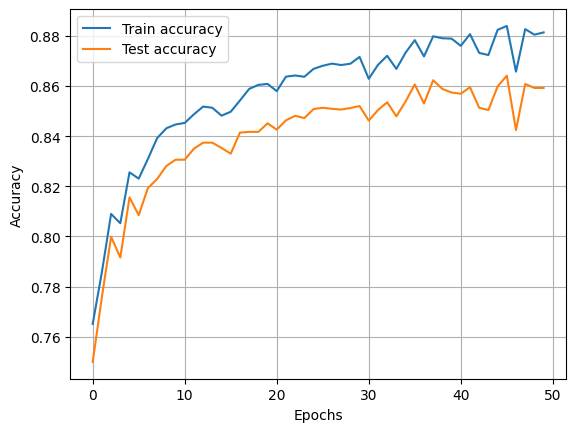

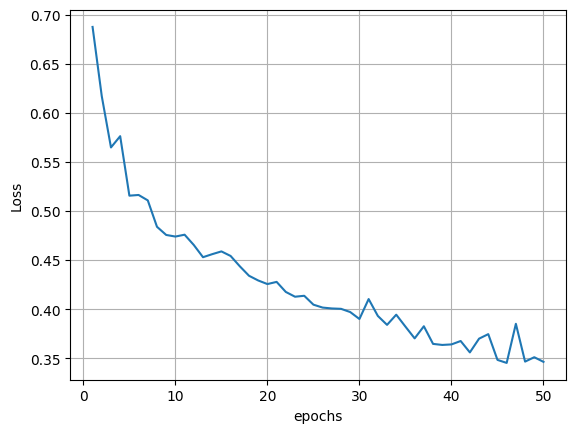

Accuracy with one layer with width 128:  0.8592
Width 256
Epoch 0
Train accuracy: 0.7722333333333333
Test accuracy: 0.7619
Epoch 1
Train accuracy: 0.7969333333333334
Test accuracy: 0.7826
Epoch 2
Train accuracy: 0.8197
Test accuracy: 0.8092
Epoch 3
Train accuracy: 0.8163333333333334
Test accuracy: 0.8011
Epoch 4
Train accuracy: 0.8323333333333334
Test accuracy: 0.8219
Epoch 5
Train accuracy: 0.8275666666666667
Test accuracy: 0.8154
Epoch 6
Train accuracy: 0.8278166666666666
Test accuracy: 0.8146
Epoch 7
Train accuracy: 0.8430333333333333
Test accuracy: 0.8281
Epoch 8
Train accuracy: 0.8464833333333334
Test accuracy: 0.8324
Epoch 9
Train accuracy: 0.8489333333333333
Test accuracy: 0.8348
Epoch 10
Train accuracy: 0.8475
Test accuracy: 0.8349
Epoch 11
Train accuracy: 0.8476833333333333
Test accuracy: 0.834
Epoch 12
Train accuracy: 0.8542166666666666
Test accuracy: 0.8401
Epoch 13
Train accuracy: 0.85505
Test accuracy: 0.8406
Epoch 14
Train accuracy: 0.8444333333333334
Test accuracy: 0.826

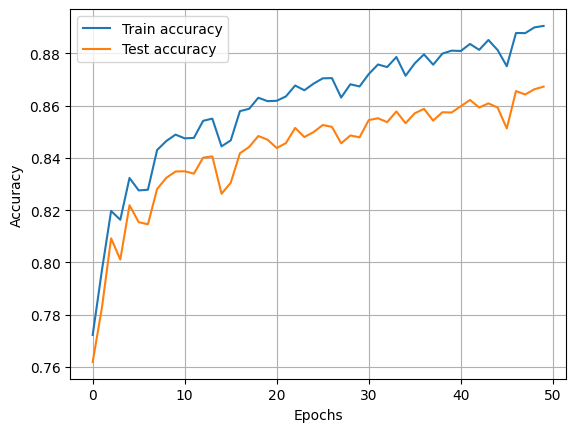

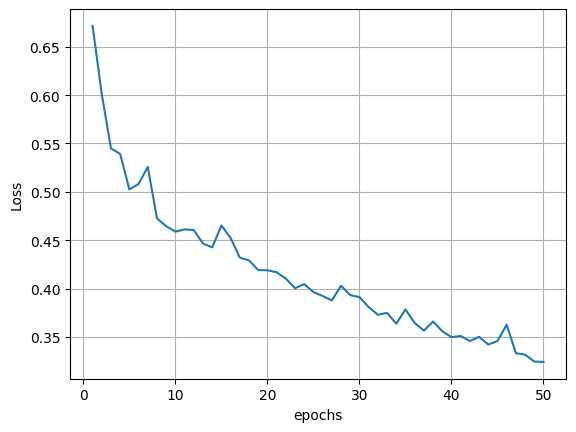

Accuracy with one layer with width 256:  0.8673
two layers:
Width 32
Epoch 0
Train accuracy: 0.7533
Test accuracy: 0.7401
Epoch 1
Train accuracy: 0.79515
Test accuracy: 0.7845
Epoch 2
Train accuracy: 0.8076666666666666
Test accuracy: 0.7942
Epoch 3
Train accuracy: 0.8185
Test accuracy: 0.8053
Epoch 4
Train accuracy: 0.8286333333333333
Test accuracy: 0.8175
Epoch 5
Train accuracy: 0.8327166666666667
Test accuracy: 0.8164
Epoch 6
Train accuracy: 0.83695
Test accuracy: 0.8229
Epoch 7
Train accuracy: 0.8455333333333334
Test accuracy: 0.8318
Epoch 8
Train accuracy: 0.8485166666666667
Test accuracy: 0.8318
Epoch 9
Train accuracy: 0.8508333333333333
Test accuracy: 0.8342
Epoch 10
Train accuracy: 0.8506166666666667
Test accuracy: 0.8369
Epoch 11
Train accuracy: 0.8502166666666666
Test accuracy: 0.8333
Epoch 12
Train accuracy: 0.8523833333333334
Test accuracy: 0.836
Epoch 13
Train accuracy: 0.8601666666666666
Test accuracy: 0.8444
Epoch 14
Train accuracy: 0.8584666666666667
Test accuracy: 0.840

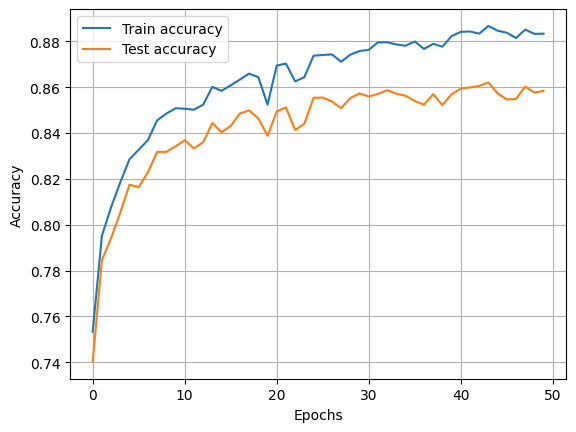

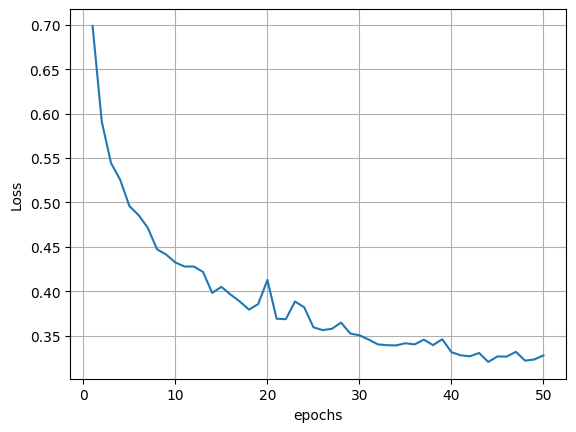

Accuracy with two layers with width 32:  0.8584
Width 64
Epoch 0
Train accuracy: 0.7672166666666667
Test accuracy: 0.7558
Epoch 1
Train accuracy: 0.7914166666666667
Test accuracy: 0.7821
Epoch 2
Train accuracy: 0.8131166666666667
Test accuracy: 0.8021
Epoch 3
Train accuracy: 0.8172333333333334
Test accuracy: 0.806
Epoch 4
Train accuracy: 0.8326333333333333
Test accuracy: 0.8212
Epoch 5
Train accuracy: 0.8401333333333333
Test accuracy: 0.8294
Epoch 6
Train accuracy: 0.8398166666666667
Test accuracy: 0.8295
Epoch 7
Train accuracy: 0.8472833333333334
Test accuracy: 0.8361
Epoch 8
Train accuracy: 0.8520166666666666
Test accuracy: 0.8375
Epoch 9
Train accuracy: 0.8476666666666667
Test accuracy: 0.8372
Epoch 10
Train accuracy: 0.8568666666666667
Test accuracy: 0.8447
Epoch 11
Train accuracy: 0.8526166666666667
Test accuracy: 0.835
Epoch 12
Train accuracy: 0.8532833333333333
Test accuracy: 0.8331
Epoch 13
Train accuracy: 0.85025
Test accuracy: 0.8317
Epoch 14
Train accuracy: 0.863383333333333

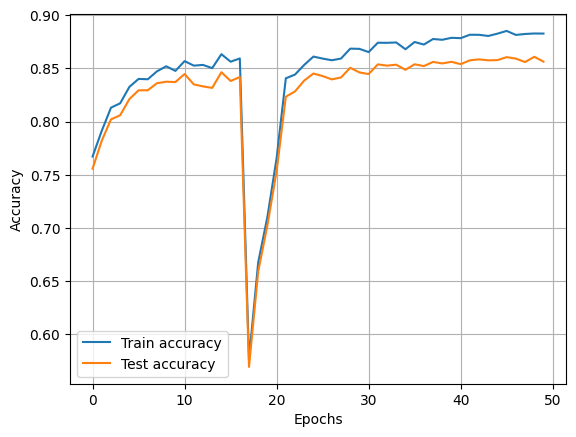

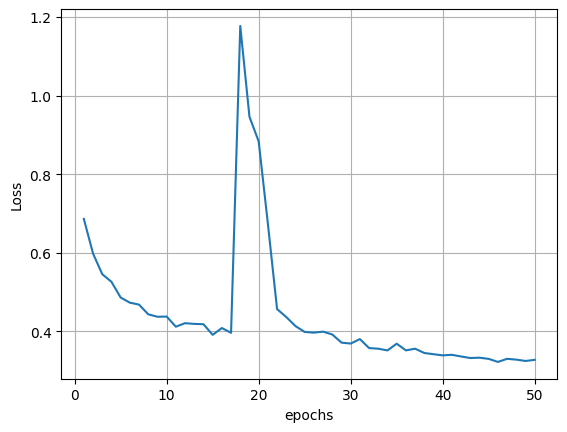

Accuracy with two layers with width 64:  0.8564
Width 128
Epoch 0
Train accuracy: 0.7606166666666667
Test accuracy: 0.751
Epoch 1
Train accuracy: 0.8113333333333334
Test accuracy: 0.7955
Epoch 2
Train accuracy: 0.8208333333333333
Test accuracy: 0.8049
Epoch 3
Train accuracy: 0.8367666666666667
Test accuracy: 0.821
Epoch 4
Train accuracy: 0.8404166666666667
Test accuracy: 0.8237
Epoch 5
Train accuracy: 0.8225666666666667
Test accuracy: 0.8083
Epoch 6
Train accuracy: 0.8493333333333334
Test accuracy: 0.8335
Epoch 7
Train accuracy: 0.8327333333333333
Test accuracy: 0.8176
Epoch 8
Train accuracy: 0.8571
Test accuracy: 0.8387
Epoch 9
Train accuracy: 0.85735
Test accuracy: 0.8405
Epoch 10
Train accuracy: 0.8633333333333333
Test accuracy: 0.8468
Epoch 11
Train accuracy: 0.8577333333333333
Test accuracy: 0.8404
Epoch 12
Train accuracy: 0.8682
Test accuracy: 0.8507
Epoch 13
Train accuracy: 0.8626166666666667
Test accuracy: 0.844
Epoch 14
Train accuracy: 0.8699666666666667
Test accuracy: 0.8537


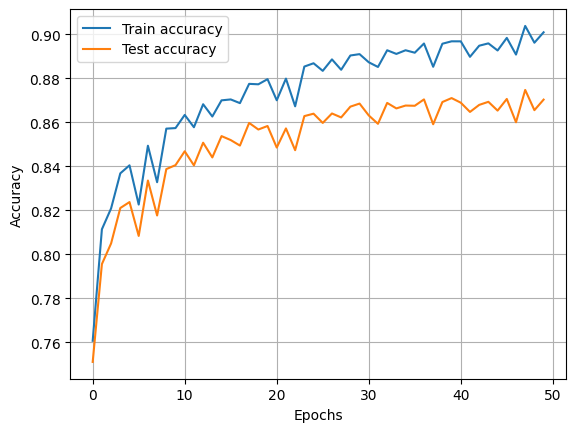

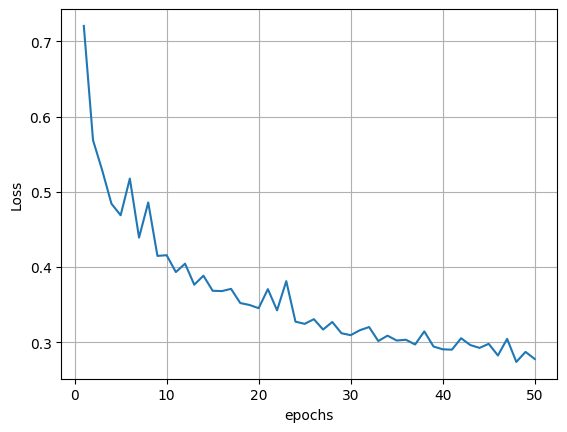

Accuracy with two layers with width 128:  0.8703
Width 256
Epoch 0
Train accuracy: 0.7743666666666666
Test accuracy: 0.7659
Epoch 1
Train accuracy: 0.81715
Test accuracy: 0.8082
Epoch 2
Train accuracy: 0.8261666666666667
Test accuracy: 0.8173
Epoch 3
Train accuracy: 0.84195
Test accuracy: 0.832
Epoch 4
Train accuracy: 0.8448166666666667
Test accuracy: 0.8349
Epoch 5
Train accuracy: 0.8494166666666667
Test accuracy: 0.8349
Epoch 6
Train accuracy: 0.8472166666666666
Test accuracy: 0.8328
Epoch 7
Train accuracy: 0.8493833333333334
Test accuracy: 0.8382
Epoch 8
Train accuracy: 0.8515
Test accuracy: 0.8387
Epoch 9
Train accuracy: 0.86035
Test accuracy: 0.8444
Epoch 10
Train accuracy: 0.8656666666666667
Test accuracy: 0.8513
Epoch 11
Train accuracy: 0.8661333333333333
Test accuracy: 0.8477
Epoch 12
Train accuracy: 0.8702666666666666
Test accuracy: 0.8538
Epoch 13
Train accuracy: 0.8668333333333333
Test accuracy: 0.8483
Epoch 14
Train accuracy: 0.8667166666666667
Test accuracy: 0.8459
Epoch 1

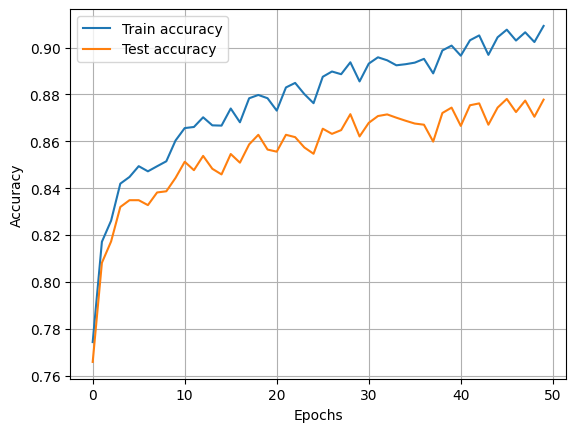

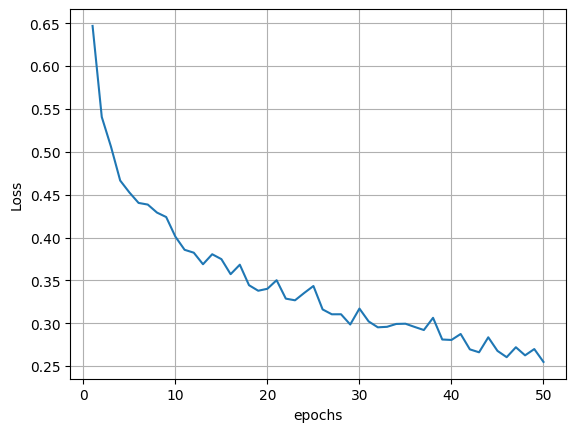

Accuracy with two layers with width 256:  0.8778


In [ ]:
widths = [32, 64, 128, 256]
print("One layer:")
for width in widths:
    print("Width "+ str(width))
    model = MultilayerPerceptron((784, width, 10), ['relu', 'softmax'])
    train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)
    y_hat = model.predict(X_test_MNIST)
    print("Accuracy with one layer with width " +str(width)+": ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))
widths = [32, 64, 128, 256]
print("two layers:")
for width in widths:
    print("Width "+ str(width))
    model = MultilayerPerceptron((784, width, width, 10), ['relu', 'relu', 'softmax'])
    train_array, test_array = model.fit(X_train_MNIST, y_train_MNIST, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)
    y_hat = model.predict(X_test_MNIST)
    print("Accuracy with two layers with width " +str(width)+": ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

Bonus 2: 10^k examples

[1, 10, 100, 1000, 10000]
Size 1
Epoch 0
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 1
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 2
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 3
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 4
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 5
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 6
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 7
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 8
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 9
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 10
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 11
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 12
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 13
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 14
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 15
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 16
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 17
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 18
Train accuracy: 0.0
Test accuracy: 0.2128
Epoch 19

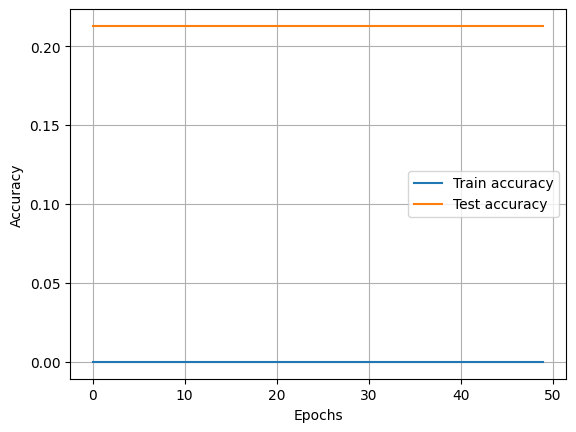

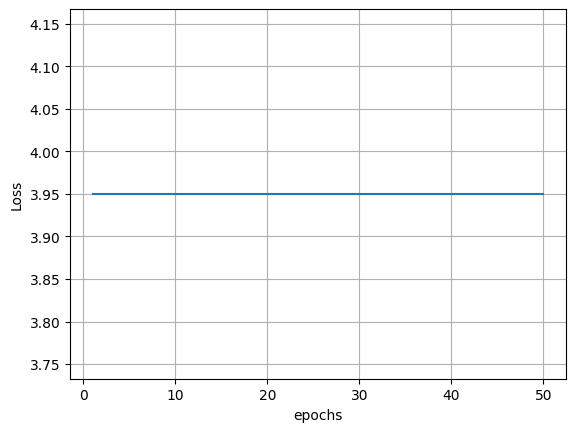

Accuracy with size 1:  0.2128
Size 10
Epoch 0
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 1
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 2
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 3
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 4
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 5
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 6
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 7
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 8
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 9
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 10
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 11
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 12
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 13
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 14
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 15
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 16
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 17
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 18
Train accuracy: 0.3
Test accuracy: 0.139
Epoch 19
Train accurac

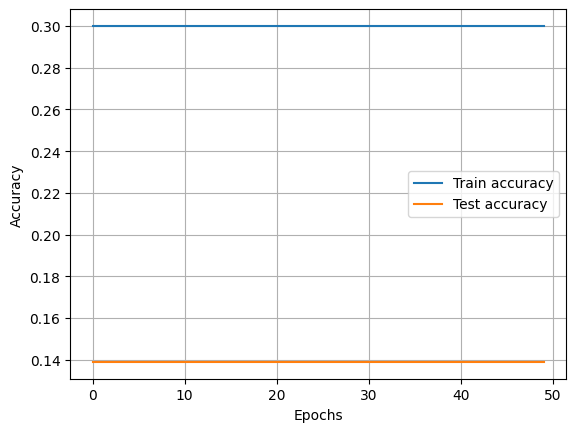

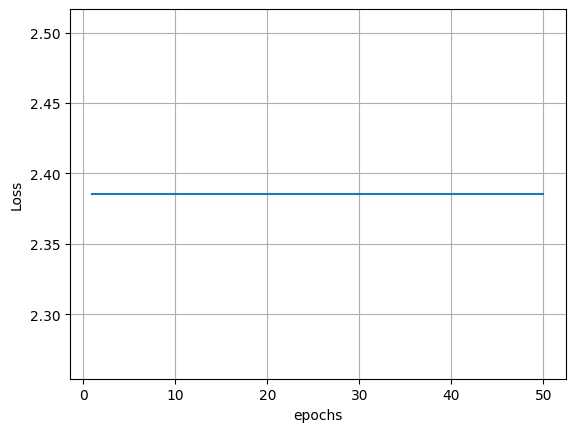

Accuracy with size 10:  0.139
Size 100
Epoch 0
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 1
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 2
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 3
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 4
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 5
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 6
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 7
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 8
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 9
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 10
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 11
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 12
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 13
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 14
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 15
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 16
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 17
Train accuracy: 0.08
Test accuracy: 0.1033
Epoch 18
Train accuracy: 0.08
Test 

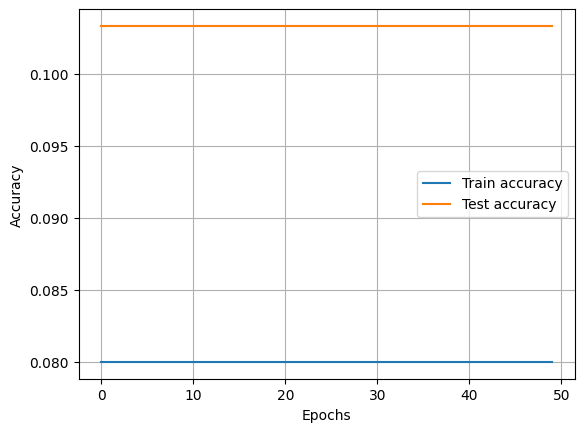

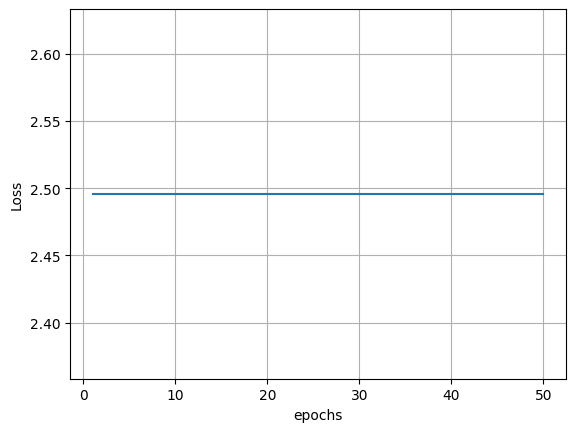

Accuracy with size 100:  0.1033
Size 1000
Epoch 0
Train accuracy: 0.155
Test accuracy: 0.1685
Epoch 1
Train accuracy: 0.261
Test accuracy: 0.2702
Epoch 2
Train accuracy: 0.403
Test accuracy: 0.3966
Epoch 3
Train accuracy: 0.522
Test accuracy: 0.5138
Epoch 4
Train accuracy: 0.59
Test accuracy: 0.5731
Epoch 5
Train accuracy: 0.616
Test accuracy: 0.6019
Epoch 6
Train accuracy: 0.619
Test accuracy: 0.6099
Epoch 7
Train accuracy: 0.631
Test accuracy: 0.6276
Epoch 8
Train accuracy: 0.651
Test accuracy: 0.6315
Epoch 9
Train accuracy: 0.648
Test accuracy: 0.6332
Epoch 10
Train accuracy: 0.651
Test accuracy: 0.637
Epoch 11
Train accuracy: 0.663
Test accuracy: 0.6422
Epoch 12
Train accuracy: 0.661
Test accuracy: 0.6451
Epoch 13
Train accuracy: 0.674
Test accuracy: 0.6484
Epoch 14
Train accuracy: 0.674
Test accuracy: 0.6512
Epoch 15
Train accuracy: 0.675
Test accuracy: 0.6498
Epoch 16
Train accuracy: 0.673
Test accuracy: 0.6517
Epoch 17
Train accuracy: 0.675
Test accuracy: 0.6535
Epoch 18
Train a

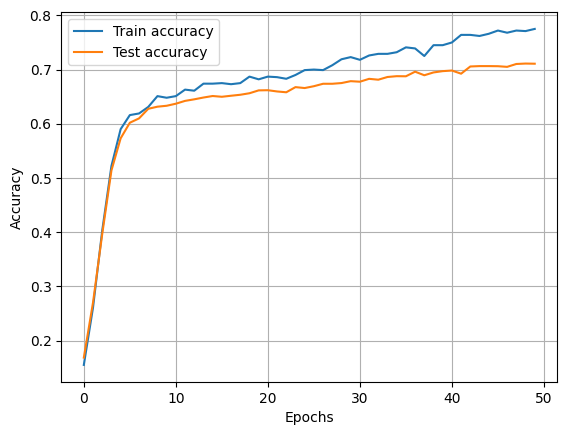

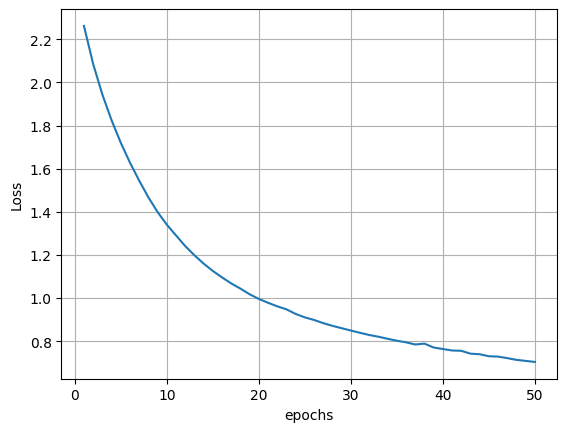

Accuracy with size 1000:  0.7108
Size 10000
Epoch 0
Train accuracy: 0.6505
Test accuracy: 0.6459
Epoch 1
Train accuracy: 0.6876
Test accuracy: 0.6761
Epoch 2
Train accuracy: 0.7112
Test accuracy: 0.7012
Epoch 3
Train accuracy: 0.7435
Test accuracy: 0.7288
Epoch 4
Train accuracy: 0.7423
Test accuracy: 0.7321
Epoch 5
Train accuracy: 0.7677
Test accuracy: 0.7527
Epoch 6
Train accuracy: 0.7759
Test accuracy: 0.7603
Epoch 7
Train accuracy: 0.7788
Test accuracy: 0.7622
Epoch 8
Train accuracy: 0.7876
Test accuracy: 0.7704
Epoch 9
Train accuracy: 0.7786
Test accuracy: 0.7696
Epoch 10
Train accuracy: 0.7918
Test accuracy: 0.7725
Epoch 11
Train accuracy: 0.7906
Test accuracy: 0.7735
Epoch 12
Train accuracy: 0.7978
Test accuracy: 0.7807
Epoch 13
Train accuracy: 0.7937
Test accuracy: 0.7796
Epoch 14
Train accuracy: 0.8033
Test accuracy: 0.7877
Epoch 15
Train accuracy: 0.7959
Test accuracy: 0.782
Epoch 16
Train accuracy: 0.812
Test accuracy: 0.7944
Epoch 17
Train accuracy: 0.8078
Test accuracy: 0.7

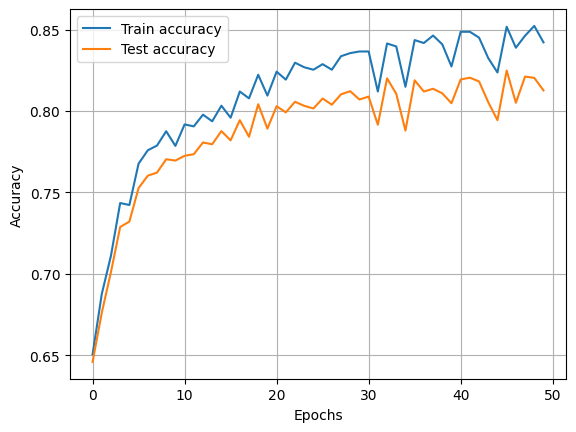

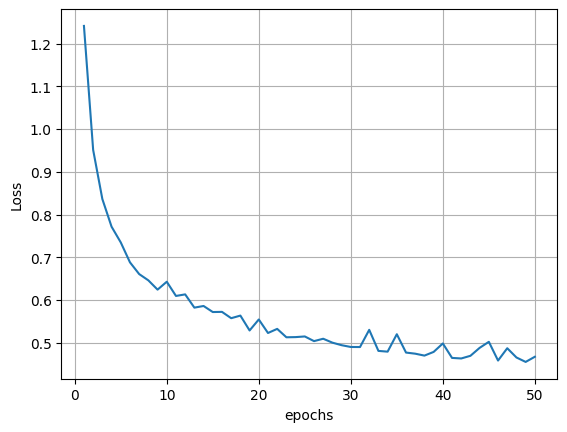

Accuracy with size 10000:  0.8127


In [ ]:
training_set_sizes = [10**k for k in range(5)]
test_accuracies = []
print(training_set_sizes)

for size in training_set_sizes:
    print('Size '+str(size))
    X_train_subset = X_train_MNIST[:size]
    y_train_subset = y_train_MNIST[:size]

    model = MultilayerPerceptron((784, 128, 10), ['relu','softmax'])
    train_array, test_array = model.fit(X_train_subset, y_train_subset, X_test_MNIST, y_test_MNIST, lam=0, batch_size=256, epochs=50, learning_rate=0.001)
    y_hat = model.predict(X_test_MNIST)
    print("Accuracy with size " +str(size)+": ", model.evaluate_acc(np.argmax(y_test_MNIST, axis=1), y_hat))

3.6 Convolutional neural network (CNN)

In [ ]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class CustomCNN(nn.Module):
    def __init__(self, layers_config, activation_type='relu', optimizer_type='Adam', momentum=0.9):
        super(CustomCNN, self).__init__()
        layers = []

        # Select activation function
        if activation_type == 'relu':
            activation = nn.ReLU()
        elif activation_type == 'sigmoid':
            activation = nn.Sigmoid()
        # Add more activation types here if needed

        for layer_config in layers_config:
            if layer_config['type'] == 'conv':
                layers.append(nn.Conv2d(
                    in_channels=layer_config['in_channels'],
                    out_channels=layer_config['out_channels'],
                    kernel_size=layer_config['kernel_size'],
                    padding=layer_config.get('padding', 0),
                    stride=layer_config.get('stride', 1)
                ))
                layers.append(activation)
            elif layer_config['type'] == 'fc':
                layers.append(nn.Linear(layer_config['in_features'], layer_config['out_features']))
                layers.append(activation)
            # Add more layer types here if needed

        self.model = nn.Sequential(*layers)
        self.optimizer_type = optimizer_type
        self.momentum = momentum

    def forward(self, x):
      for layer in self.model:
          if isinstance(layer, nn.Linear):
            #print("Linearization")
            x = x.view(x.size(0), -1)  # Flatten the tensor for fully connected layer
            #print(x.size())
          x = layer(x)
          #print(x.size())
      return x


    def fit(self, train_loader, test_loader, max_epochs, verbose=True):
        # Initialize loss function and optimizer
                # Initialize loss function
        criterion = nn.CrossEntropyLoss()

        # Select optimizer

        print(self.optimizer_type)

        if self.optimizer_type == 'Adam':
          optimizer = optim.Adam(self.parameters())
        elif self.optimizer_type == 'SGD':
          print(self.momentum)
          optimizer = optim.SGD(self.parameters(), lr = 0.01, momentum=self.momentum)

        else:
            raise ValueError(f"Unknown optimizer type: {self.optimizer_type}")


        # Initialize lists to store metrics for plotting
        train_losses = []
        train_accuracies = []
        test_accuracies = []

        # Training loop
        for epoch in range(max_epochs):
            for i, (inputs, labels) in enumerate(train_loader, 0):
                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = self(inputs)

                # Compute the loss
                loss = criterion(outputs, labels)

                # Backward pass and optimization
                loss.backward()
                optimizer.step()

            # Calculate training loss and accuracy
            train_loss = 0.0
            correct = 0
            total = 0
            for inputs, labels in train_loader:
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()



            train_loss /= len(train_loader)
            train_accuracy = 100 * correct / total


            # Calculate testing accuracy
            correct_test = 0
            total_test = 0
            with torch.no_grad():  # Disable gradient calculation for efficiency
                for inputs_test, labels_test in test_loader:
                    outputs_test = self(inputs_test)
                    _, predicted_test = torch.max(outputs_test.data, 1)
                    total_test += labels_test.size(0)
                    correct_test += (predicted_test == labels_test).sum().item()
            test_accuracy = 100 * correct_test / total_test

            if verbose:
              print(f"Epoch {epoch+1}, Loss: {train_loss}, Training Accuracy: {train_accuracy}%, Testing Accuracy: {test_accuracy}%")

            # Store metrics for plotting
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)  # Append testing accuracy to list

        # If verbose, plot metrics
        if verbose:
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.plot(range(max_epochs), train_losses, label='Training Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training Loss over Epochs')

            plt.subplot(1, 2, 2)
            plt.plot(range(max_epochs), train_accuracies, label='Training Accuracy')
            plt.plot(range(max_epochs), test_accuracies, label='Testing Accuracy')  # Plot testing accuracy alongside training accuracy
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy (%)')
            plt.title('Training and Testing Accuracy over Epochs')
            plt.legend()  # Add a legend to differentiate between training and testing accuracy

            plt.show()


Epoch 1, Loss: 0.7118946042841178, Training Accuracy: 73.48%, Testing Accuracy: 72.61%
Epoch 2, Loss: 0.42159472525056235, Training Accuracy: 84.785%, Testing Accuracy: 82.58%
Epoch 3, Loss: 0.37676534829522246, Training Accuracy: 86.165%, Testing Accuracy: 83.3%
Epoch 4, Loss: 0.34310561144498114, Training Accuracy: 87.18%, Testing Accuracy: 83.3%
Epoch 5, Loss: 0.31130952995691474, Training Accuracy: 87.94833333333334%, Testing Accuracy: 83.48%
Epoch 6, Loss: 0.28922366648753567, Training Accuracy: 88.60166666666667%, Testing Accuracy: 83.16%
Epoch 7, Loss: 0.052667777097078046, Training Accuracy: 98.49166666666666%, Testing Accuracy: 91.18%
Epoch 8, Loss: 0.044101167684679095, Training Accuracy: 98.70333333333333%, Testing Accuracy: 91.07%
Epoch 9, Loss: 0.03143128288654374, Training Accuracy: 98.98%, Testing Accuracy: 91.61%
Epoch 10, Loss: 0.023352610663935812, Training Accuracy: 99.28666666666666%, Testing Accuracy: 91.34%


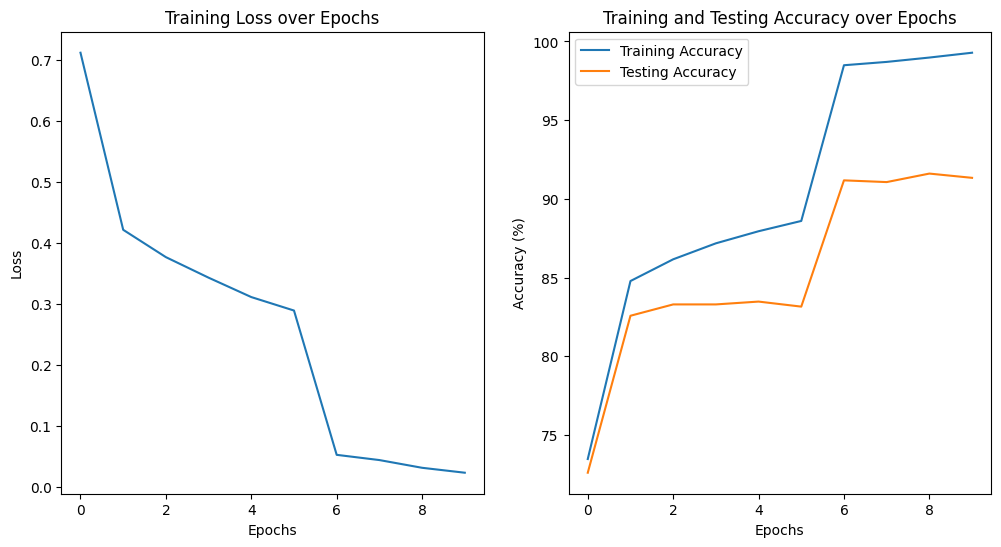

In [ ]:
#define the layers architecture of the CNN
"""
layers_config = [
    {'type': 'conv', 'in_channels': 1, 'out_channels': 32, 'kernel_size': 3},
    {'type': 'conv', 'in_channels': 32, 'out_channels': 64, 'kernel_size': 3},
    {'type': 'fc', 'in_features': 64 * 24 * 24, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 10}
]
"""

layers_config = [
    {'type': 'conv', 'in_channels': 1, 'out_channels': 6, 'kernel_size': 3},
    {'type': 'conv', 'in_channels': 12, 'out_channels': 64, 'kernel_size': 3},
    {'type': 'fc', 'in_features': 64 * 24 * 24, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 10}
]

activation_type = 'relu'

#Train the CNN
model = CustomCNN(layers_config, activation_type)
model.fit(train_loader_MNIST, test_loader_MNIST, max_epochs=10, verbose=True)

Epoch 1, Loss: 0.9764651956715817, Training Accuracy: 67.72%, Testing Accuracy: 67.02%
Epoch 2, Loss: 0.9233551618895297, Training Accuracy: 71.90166666666667%, Testing Accuracy: 70.78%
Epoch 3, Loss: 0.8826046196509526, Training Accuracy: 71.72166666666666%, Testing Accuracy: 70.45%
Epoch 4, Loss: 0.8735340092736267, Training Accuracy: 71.245%, Testing Accuracy: 70.09%
Epoch 5, Loss: 0.8495687632354846, Training Accuracy: 73.915%, Testing Accuracy: 72.11%
Epoch 6, Loss: 0.8328309491562691, Training Accuracy: 73.67666666666666%, Testing Accuracy: 71.76%
Epoch 7, Loss: 0.8161283878883573, Training Accuracy: 74.52166666666666%, Testing Accuracy: 72.2%
Epoch 8, Loss: 0.7997401676960846, Training Accuracy: 75.43333333333334%, Testing Accuracy: 72.6%
Epoch 9, Loss: 0.7906211350899516, Training Accuracy: 75.59333333333333%, Testing Accuracy: 72.42%
Epoch 10, Loss: 0.7781189631805745, Training Accuracy: 75.295%, Testing Accuracy: 71.55%
Epoch 11, Loss: 0.7593685404768885, Training Accuracy: 7

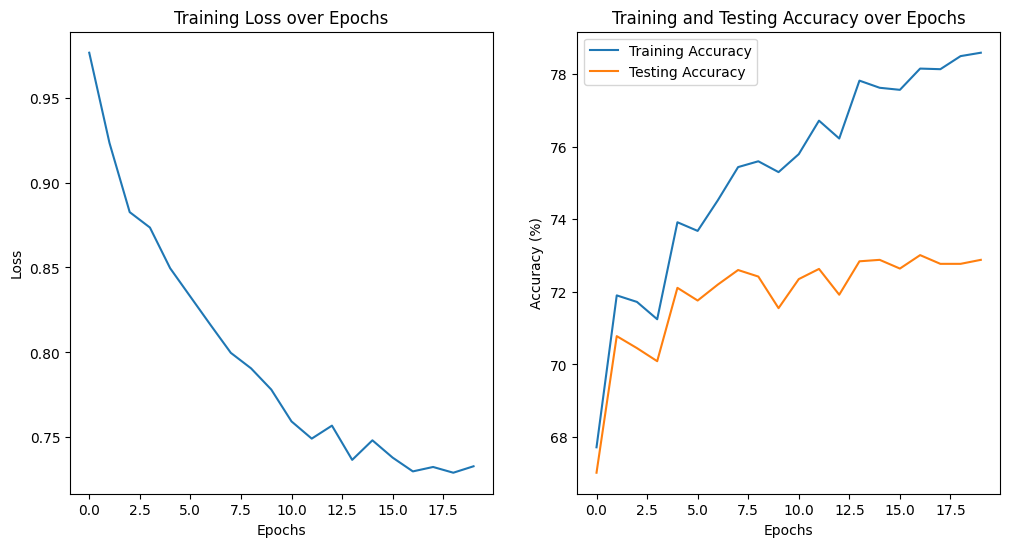

In [ ]:
layers_config = [
    {'type': 'conv', 'in_channels': 1, 'out_channels': 6, 'kernel_size': 5},
    {'type': 'conv', 'in_channels': 6, 'out_channels': 12, 'kernel_size': 5},
    {'type': 'fc', 'in_features': 12 * 20 * 20, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 10}
]

activation_type = 'relu'

#Train the CNN on MNIST
model = CustomCNN(layers_config, activation_type)
model.fit(train_loader_MNIST, test_loader_MNIST, max_epochs=20, verbose=True)

3.7 CNN and CIFAR-10

Epoch 1, Loss: 1.784763189075548, Training Accuracy: 40.074%, Testing Accuracy: 39.64%
Epoch 2, Loss: 1.732707226215421, Training Accuracy: 44.94%, Testing Accuracy: 43.68%
Epoch 3, Loss: 1.5702682100903347, Training Accuracy: 50.006%, Testing Accuracy: 47.48%
Epoch 4, Loss: 1.4870465338382575, Training Accuracy: 52.722%, Testing Accuracy: 49.13%
Epoch 5, Loss: 1.433663468684077, Training Accuracy: 55.942%, Testing Accuracy: 49.99%
Epoch 6, Loss: 1.3561680266619338, Training Accuracy: 57.562%, Testing Accuracy: 51.15%
Epoch 7, Loss: 1.317191321450426, Training Accuracy: 58.978%, Testing Accuracy: 51.9%
Epoch 8, Loss: 1.2672859216894945, Training Accuracy: 60.594%, Testing Accuracy: 51.36%
Epoch 9, Loss: 1.2396903261351768, Training Accuracy: 61.612%, Testing Accuracy: 51.42%
Epoch 10, Loss: 1.175817504258412, Training Accuracy: 63.972%, Testing Accuracy: 52.44%
Epoch 11, Loss: 1.1639211933936, Training Accuracy: 63.576%, Testing Accuracy: 51.76%
Epoch 12, Loss: 1.091474641924319, Train

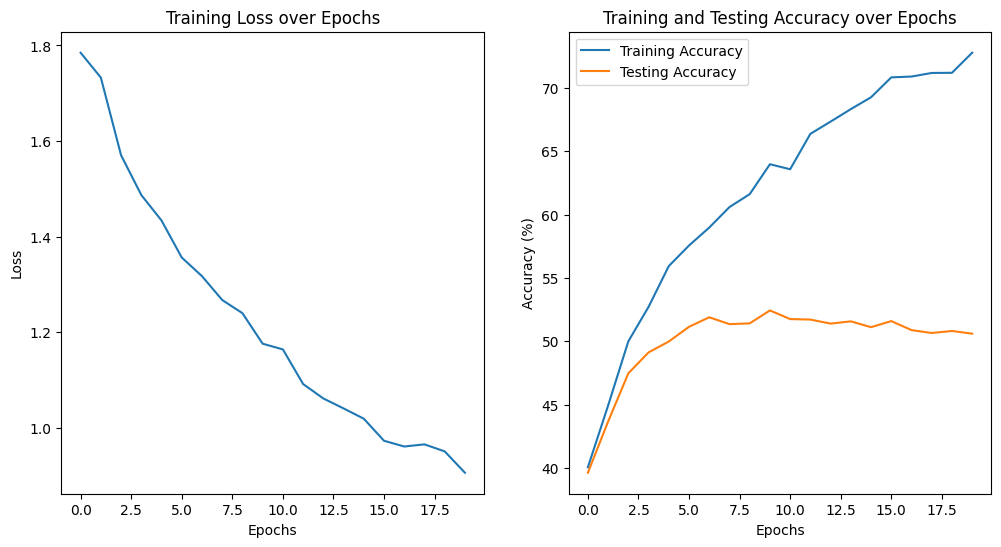

In [ ]:
#define the layers architecture of the CNN

layers_config = [
    {'type': 'conv', 'in_channels': 3, 'out_channels': 12, 'kernel_size': 5, 'padding': 2, 'stride' : 2 },
    {'type': 'conv', 'in_channels': 12, 'out_channels': 36, 'kernel_size': 3, 'padding' : 1, 'stride' : 2},
    {'type': 'fc', 'in_features': 36 * 8 * 8, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 10}
]


activation_type = 'relu'

#Train the CNN on CIFAR
model = CustomCNN(layers_config, activation_type)
model.fit(train_loader_CIFAR10, test_loader_CIFAR10, max_epochs=20, verbose=True)

Epoch 0
Train accuracy: 0.27596
Test accuracy: 0.2736
Epoch 1
Train accuracy: 0.3778
Test accuracy: 0.3743
Epoch 2
Train accuracy: 0.39876
Test accuracy: 0.3907
Epoch 3
Train accuracy: 0.38714
Test accuracy: 0.3843
Epoch 4
Train accuracy: 0.4056
Test accuracy: 0.4015
Epoch 5
Train accuracy: 0.39694
Test accuracy: 0.3869
Epoch 6
Train accuracy: 0.43274
Test accuracy: 0.426
Epoch 7
Train accuracy: 0.42752
Test accuracy: 0.4163
Epoch 8
Train accuracy: 0.45056
Test accuracy: 0.4394
Epoch 9
Train accuracy: 0.45136
Test accuracy: 0.439


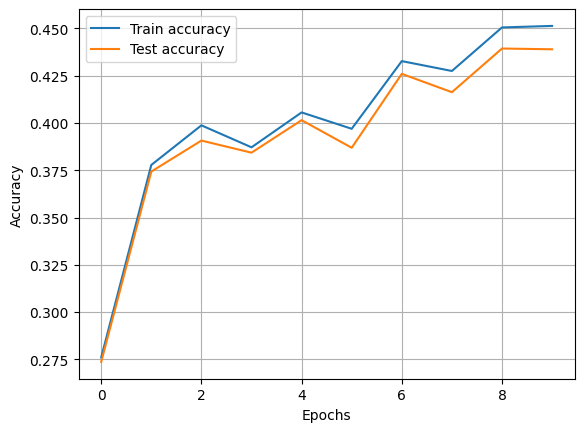

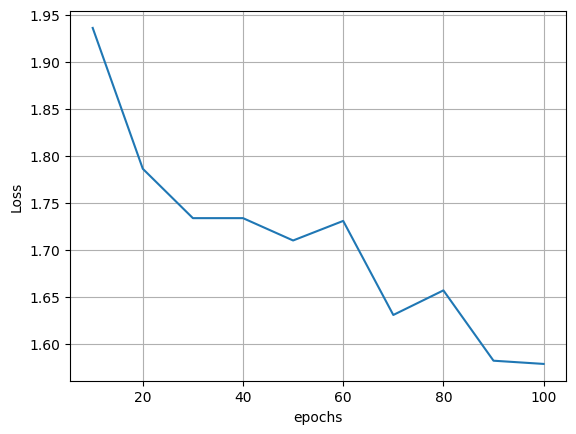

In [ ]:
#Train MLP with CIFAR-10
# The CIFAR-10 has a dimention of 3072 (1024 pixels * 3 RGB values)

# Create an instance MLP model CIFAR-10
model = MultilayerPerceptron((3072, 1024, 1024, 10), ['leakyrelu', 'leakyrelu', 'softmax'])
train_array, test_array = model.fit(X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR, lam=0, batch_size=256, epochs=10, learning_rate=0.001)



3.8 SGD Optimizer on CIFAR-10

SGD
0.0
Epoch 1, Loss: 2.292062805741644, Training Accuracy: 18.45%, Testing Accuracy: 18.32%
Epoch 2, Loss: 2.1333459269665087, Training Accuracy: 22.09%, Testing Accuracy: 22.3%
Epoch 3, Loss: 1.9198997753965275, Training Accuracy: 31.442%, Testing Accuracy: 31.89%
Epoch 4, Loss: 1.80079200353159, Training Accuracy: 35.862%, Testing Accuracy: 36.22%
Epoch 5, Loss: 1.9631753400768466, Training Accuracy: 30.514%, Testing Accuracy: 30.38%
Epoch 6, Loss: 1.6906369363560396, Training Accuracy: 38.986%, Testing Accuracy: 39.1%
Epoch 7, Loss: 1.6602450171699914, Training Accuracy: 39.818%, Testing Accuracy: 39.94%
Epoch 8, Loss: 1.5460163880796993, Training Accuracy: 44.876%, Testing Accuracy: 44.81%
Epoch 9, Loss: 1.575990522761479, Training Accuracy: 42.43%, Testing Accuracy: 41.92%
Epoch 10, Loss: 1.5239889922044467, Training Accuracy: 44.658%, Testing Accuracy: 44.76%
Epoch 11, Loss: 1.5520248477111387, Training Accuracy: 45.55%, Testing Accuracy: 45.0%
Epoch 12, Loss: 1.448028987478417

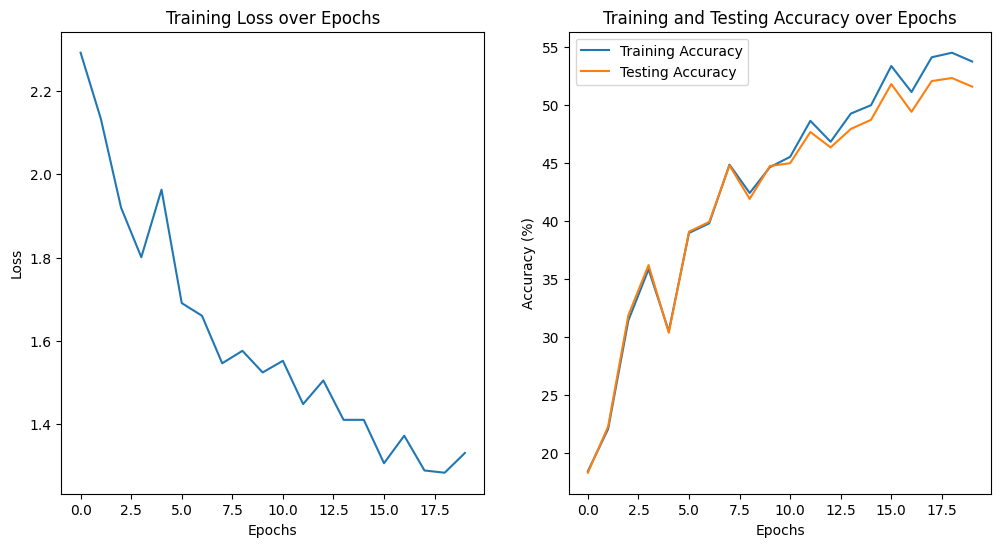

SGD
0.9
Epoch 1, Loss: 1.8024740136797777, Training Accuracy: 33.888%, Testing Accuracy: 34.32%
Epoch 2, Loss: 1.4504204018951377, Training Accuracy: 47.396%, Testing Accuracy: 47.74%
Epoch 3, Loss: 1.2960940828103849, Training Accuracy: 53.46%, Testing Accuracy: 51.79%
Epoch 4, Loss: 1.181337125389777, Training Accuracy: 57.714%, Testing Accuracy: 54.55%
Epoch 5, Loss: 1.0342548892016301, Training Accuracy: 63.044%, Testing Accuracy: 58.14%
Epoch 6, Loss: 0.9709216051394373, Training Accuracy: 65.622%, Testing Accuracy: 58.39%
Epoch 7, Loss: 0.8133072601559826, Training Accuracy: 71.76%, Testing Accuracy: 61.19%
Epoch 8, Loss: 0.7469716348001719, Training Accuracy: 73.924%, Testing Accuracy: 61.02%
Epoch 9, Loss: 0.6348345376112882, Training Accuracy: 78.182%, Testing Accuracy: 62.18%
Epoch 10, Loss: 0.6095077028436124, Training Accuracy: 78.812%, Testing Accuracy: 60.8%
Epoch 11, Loss: 0.49622875861728283, Training Accuracy: 82.7%, Testing Accuracy: 60.43%
Epoch 12, Loss: 0.431517286

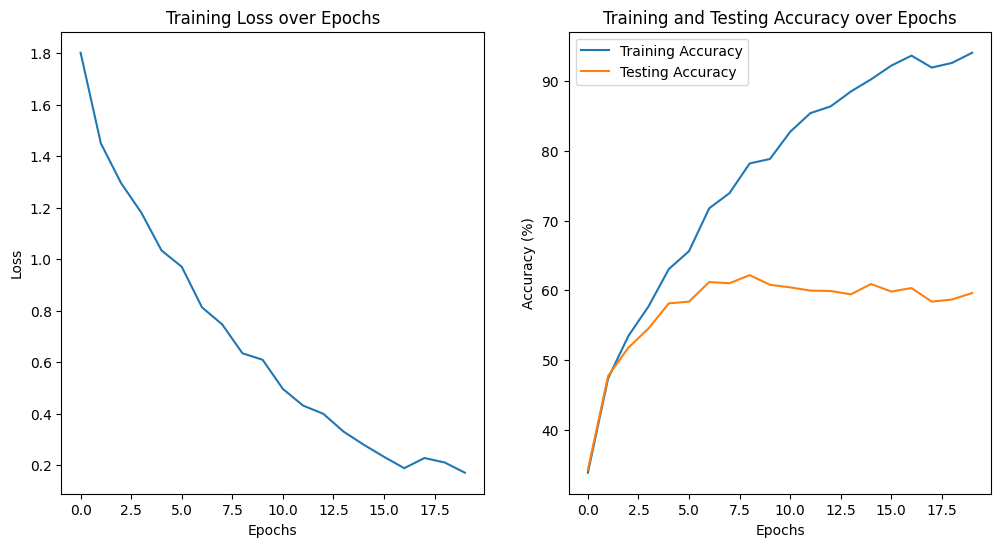

Adam
Epoch 1, Loss: 1.6757079715009235, Training Accuracy: 42.562%, Testing Accuracy: 42.05%
Epoch 2, Loss: 1.535194218463605, Training Accuracy: 47.608%, Testing Accuracy: 46.23%
Epoch 3, Loss: 1.4603770419459818, Training Accuracy: 49.908%, Testing Accuracy: 47.43%
Epoch 4, Loss: 1.3654735273564869, Training Accuracy: 53.666%, Testing Accuracy: 50.01%
Epoch 5, Loss: 1.2861900777005784, Training Accuracy: 56.518%, Testing Accuracy: 51.51%
Epoch 6, Loss: 1.2120883525789852, Training Accuracy: 58.544%, Testing Accuracy: 51.83%
Epoch 7, Loss: 1.1688396394862544, Training Accuracy: 59.52%, Testing Accuracy: 51.52%
Epoch 8, Loss: 1.1275840398600645, Training Accuracy: 60.848%, Testing Accuracy: 52.07%
Epoch 9, Loss: 1.073523537124819, Training Accuracy: 62.642%, Testing Accuracy: 51.71%
Epoch 10, Loss: 1.027165361834914, Training Accuracy: 63.798%, Testing Accuracy: 51.23%


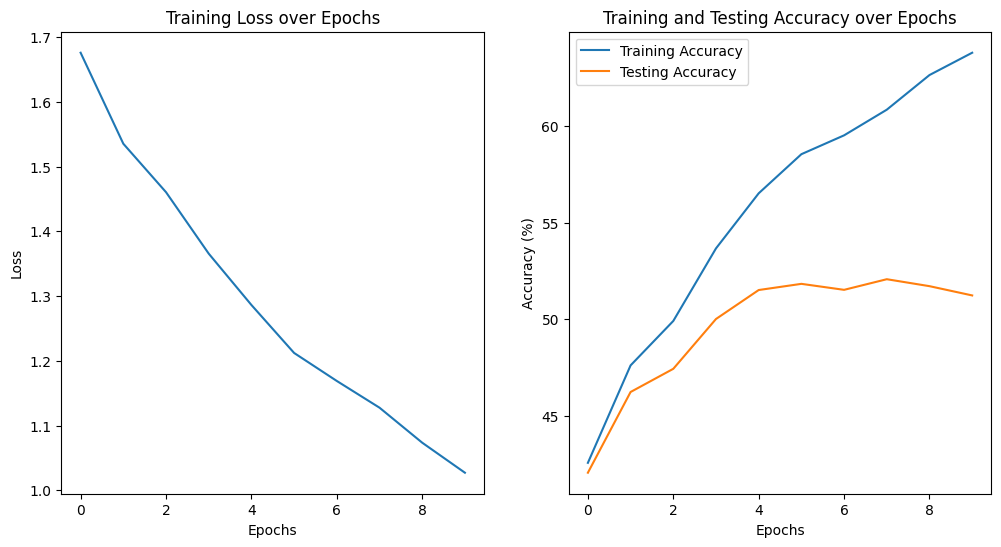

In [ ]:
#Below are 3 different setups

layers_config = [
    {'type': 'conv', 'in_channels': 3, 'out_channels': 12, 'kernel_size': 5, 'padding': 2, 'stride' : 2 },
    {'type': 'conv', 'in_channels': 12, 'out_channels': 36, 'kernel_size': 3, 'padding' : 1, 'stride' : 2},
    {'type': 'fc', 'in_features': 36 * 8 * 8, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 128},
    {'type': 'fc', 'in_features': 128, 'out_features': 10}
]

activation_type = 'relu'

#1) CNN with SGD optimizer and momentum of 0

model = CustomCNN(layers_config, activation_type, optimizer_type= 'SGD', momentum=0.0)
model.fit(train_loader_CIFAR10, test_loader_CIFAR10, max_epochs=20, verbose=True)


#2) CNN with SGD optimizer and momentum of 0.9

model = CustomCNN(layers_config, activation_type, optimizer_type='SGD', momentum=0.9)
model.fit(train_loader_CIFAR10, test_loader_CIFAR10, max_epochs=20, verbose=True)

#3) CNN with Adam optimizer

model = CustomCNN(layers_config, activation_type, optimizer_type='Adam', momentum=0.9)
model.fit(train_loader_CIFAR10, test_loader_CIFAR10, max_epochs=10, verbose=True)

